<a href="https://colab.research.google.com/github/jiguday/practicegit/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

Mobile Price Range Prediction




##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1**-  Uday Kumar


# **Project Summary -**

**Data Preprocessing** :

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**

1.Firstly Checked correlation between Each Features in dataset.

2.Checked if bluetooth and wifi available or not???

3.Checked can Battery Power be affected in mobile Price?? and how the battery mAh is spread

4.Checked can Ram, Screen Height  ,Screen width,pixel Height ,pixel width be affected in mobile Price??

5.Checked can 4G and 3G be affected in mobile Price??

6.Checked can FC (front camera megapixels) ,PC (Primary camera Megapixels) and Mobile Weight affected in mobile Price??

**Supervise Machine learning algorithms and implementation :**

1. Logistic regression

2. Random Forest Classifier

3. XG Boost Classifier







# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/input/data_mobile_price_range.csv'

df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

We have 0 duplicate values in dataset.

In [ ]:
# remove zero values of pixel resolution height and screen width
df = df[df['sc_w'] != 0]
df = df[df['px_height'] != 0]
df.shape

(1819, 21)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

So there are no null values.

Text(0.5, 1.0, ' Visualising Missing Values')

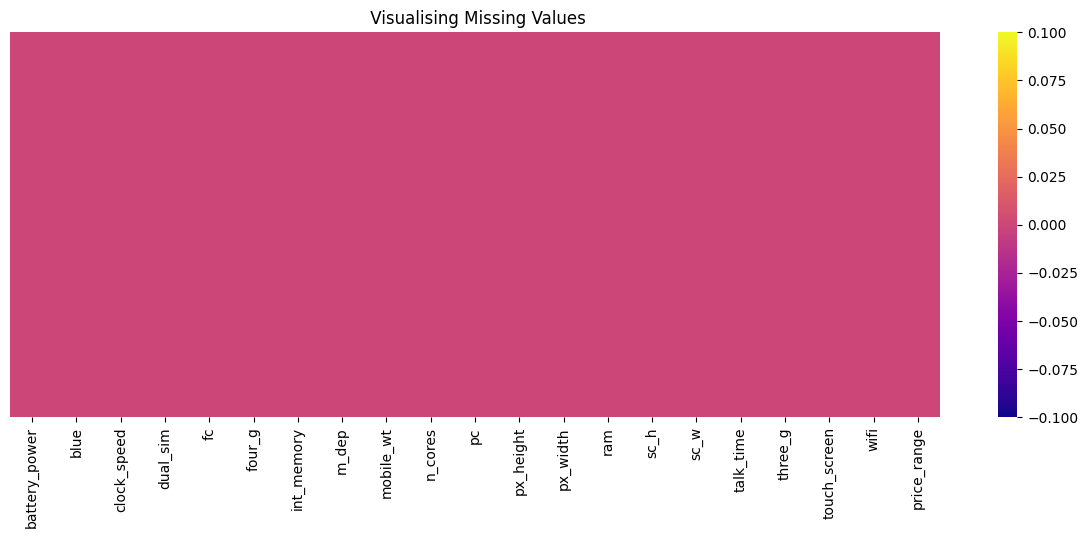

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

## ***2. Understanding our Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,...,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,1238.031336,0.503573,1.519406,0.504673,4.319956,0.524464,32.156130,0.499835,140.578340,4.531061,...,647.086861,1252.828477,2133.468939,12.488730,6.338098,11.009346,0.760858,0.507422,0.513469,1.509621
std,439.989288,0.500125,0.813975,0.500116,4.355982,0.499538,18.105723,0.288875,35.437231,2.288705,...,444.741154,432.418889,1087.488721,4.166008,4.153085,5.456642,0.426677,0.500082,0.499956,1.119529
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,877.000000,1203.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1231.000000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,5.000000,...,562.000000,1251.000000,2175.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.500000,7.000000,...,952.000000,1633.000000,3072.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
variables_df = df.columns.to_list()

In [ ]:
for i in variables_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of battery_power are: [ 842 1021  563 ... 1139 1467  858]
The Unique Values of blue are: [0 1]
The Unique Values of clock_speed are: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.1 1.  0.9 1.1 2.6 2.8 1.4 1.6 2.7 1.3 2.3
 2.  1.8 1.5 1.9 3.  2.4 0.8 0.7]
The Unique Values of dual_sim are: [0 1]
The Unique Values of fc are: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
The Unique Values of four_g are: [0 1]
The Unique Values of int_memory are: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38 57 51 21  5 60
 61  6 11 50 34 20 27 42 40 64 63 43 16 48 12 55 36 30 45 29 58 25  3 54
 15 14 37 31  8 32  4 18 56 26 35 59 28 62  2]
The Unique Values of m_dep are: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
The Unique Values of mobile_wt are: [188 136 145 131 141 164 139 187 174  93 182 177 198 185 159 196 121 101
  81 156 199 114 132 143  96 200  88 150 107 157 160 119  87 166 110 118
 162 111 127 109 102 104 148 180 128 134 144 168 155 165  80 138 142  90
 197 172 116

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [ ]:
print(categorical_columns)

['three_g', 'touch_screen', 'price_range', 'blue', 'dual_sim', 'wifi', 'four_g']


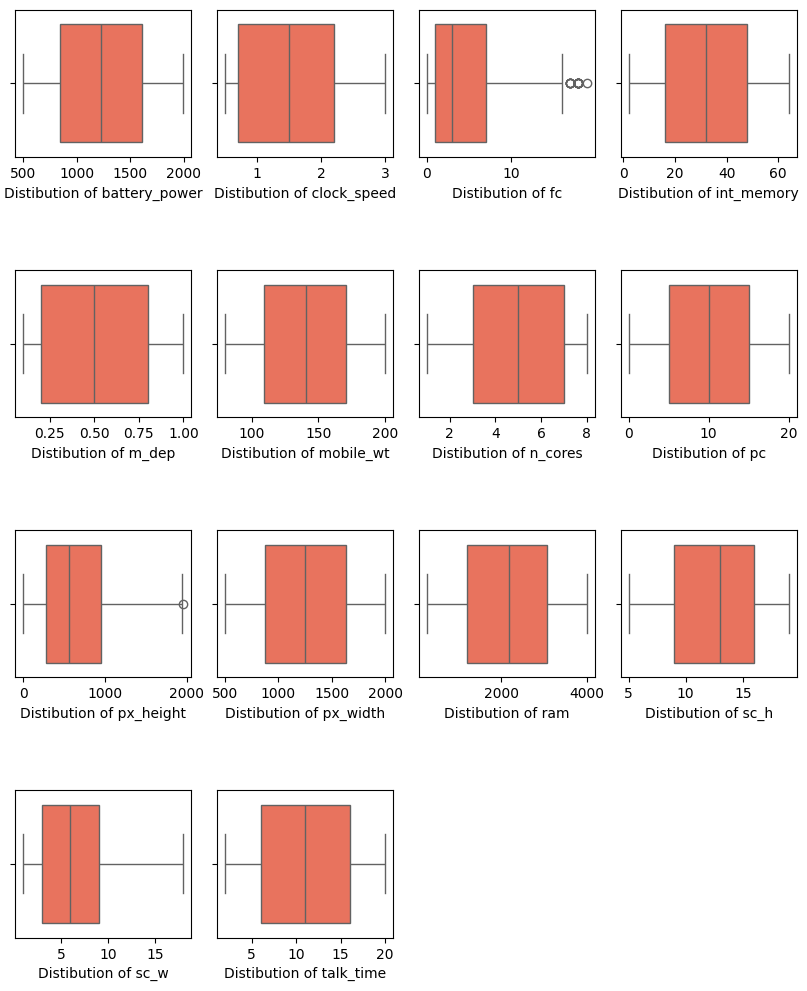

In [ ]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df,color="tomato")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

There is no outliers.

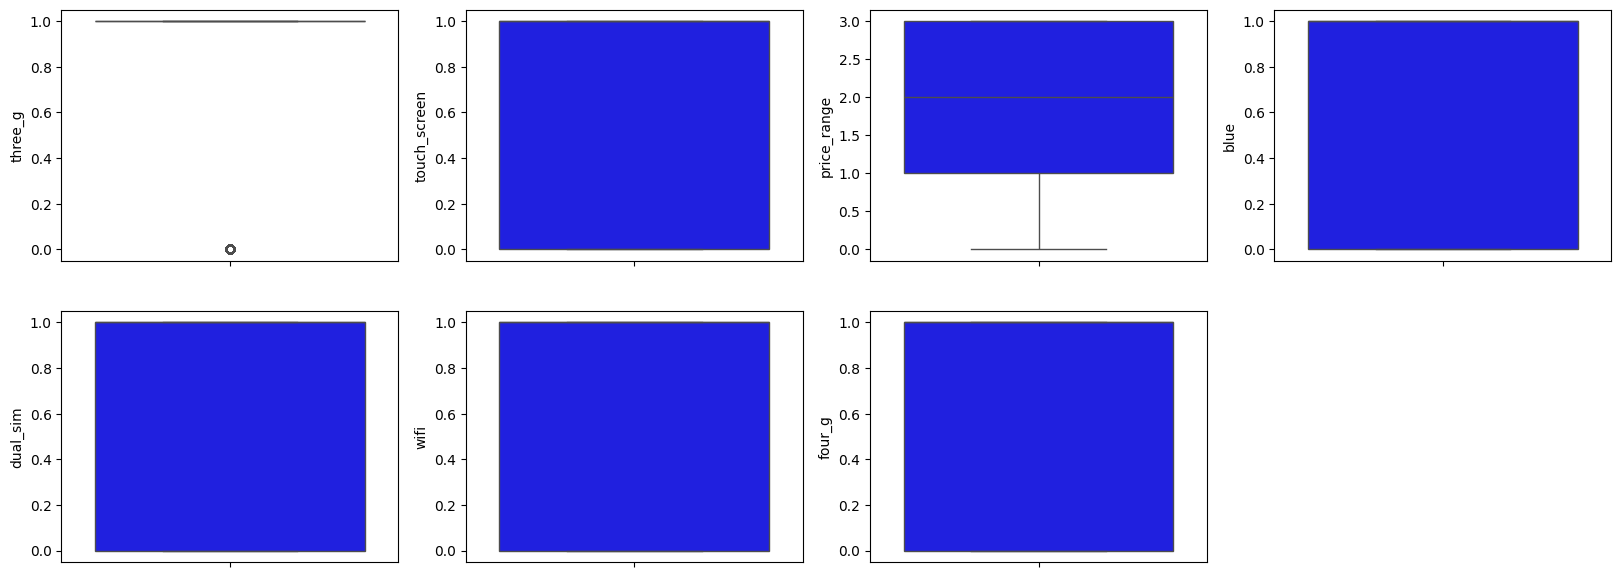

In [ ]:
columns = categorical_columns
plt.figure(figsize=(20,15))
m=1
for i in columns:
  plt.subplot(4,4,m)
  m = m+1
  sns.boxplot(df[i],color="blue")

### What all manipulations have we done and insights we found?

We have created a separate columns for Numerical and Categorical Variables to work accordingly.It will help to understand the basic relationship between the features(defined as Categorical and Numerical) and the target variables.

**Nearest Neighbors Imputations (KNN Imputer)**

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

In [ ]:
# importing KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_data=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [ ]:
# Checking How many observations having sc_w value as 0.
df[df['sc_w']==0].shape[0]

0

In [ ]:
# Checking shape
df.shape

(1819, 21)

We used k-Nearest Neighbors approach to impute missing values where a Euclidean distance is used to find the nearest neighbors.

So we have handled the mismatched values of the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Relation Between RAM,Battery_power,px_height and px_width**

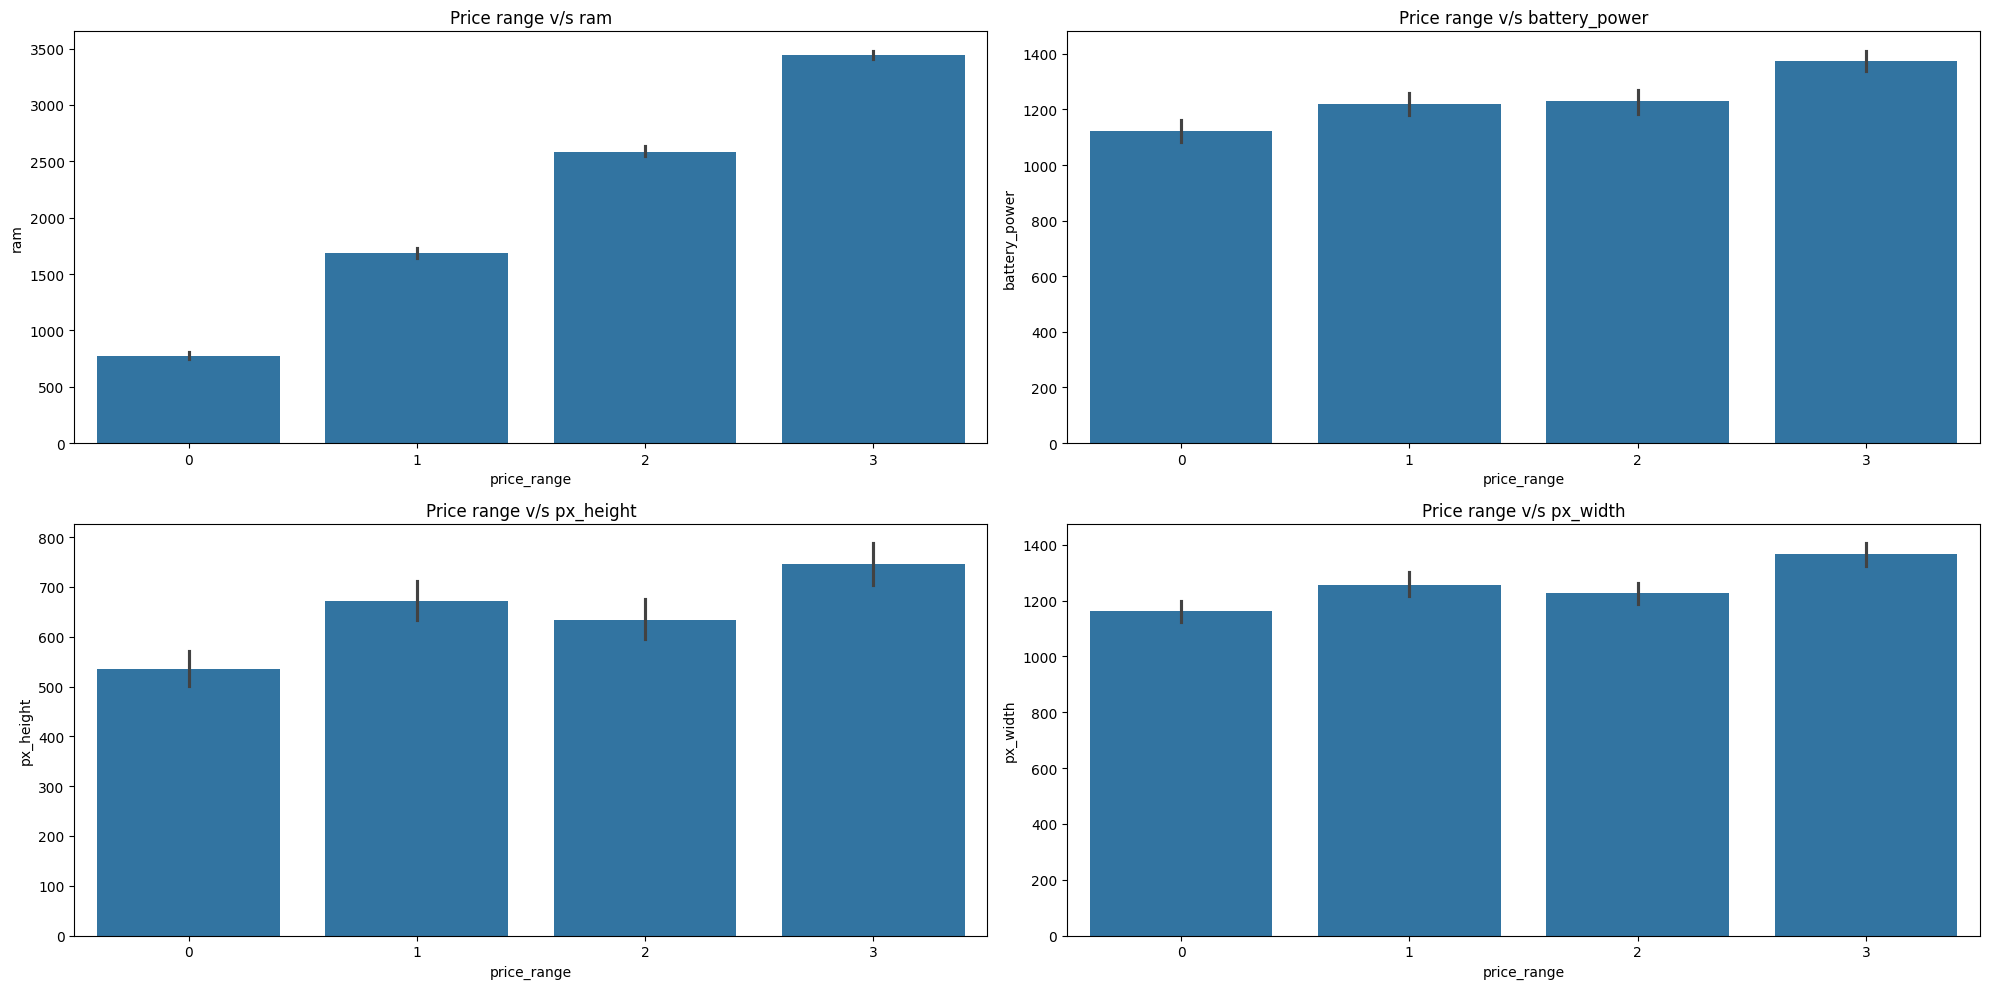

In [ ]:
# Chart - 1 visualization code
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['price_range'],y=df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

* Mobiles having RAM more than 3000 MB falls under Very high cost category.As RAM increases price range also increases.
* Mobiles having RAM less than 1000 MB falls under low cost category.
* Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.
* Mobiles with more than 700 pixel height and width more than 1300 has very high cost.

**Specification Check**

In [ ]:
# Checking the counts of binary categorical variables by grouping price range.
group_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()


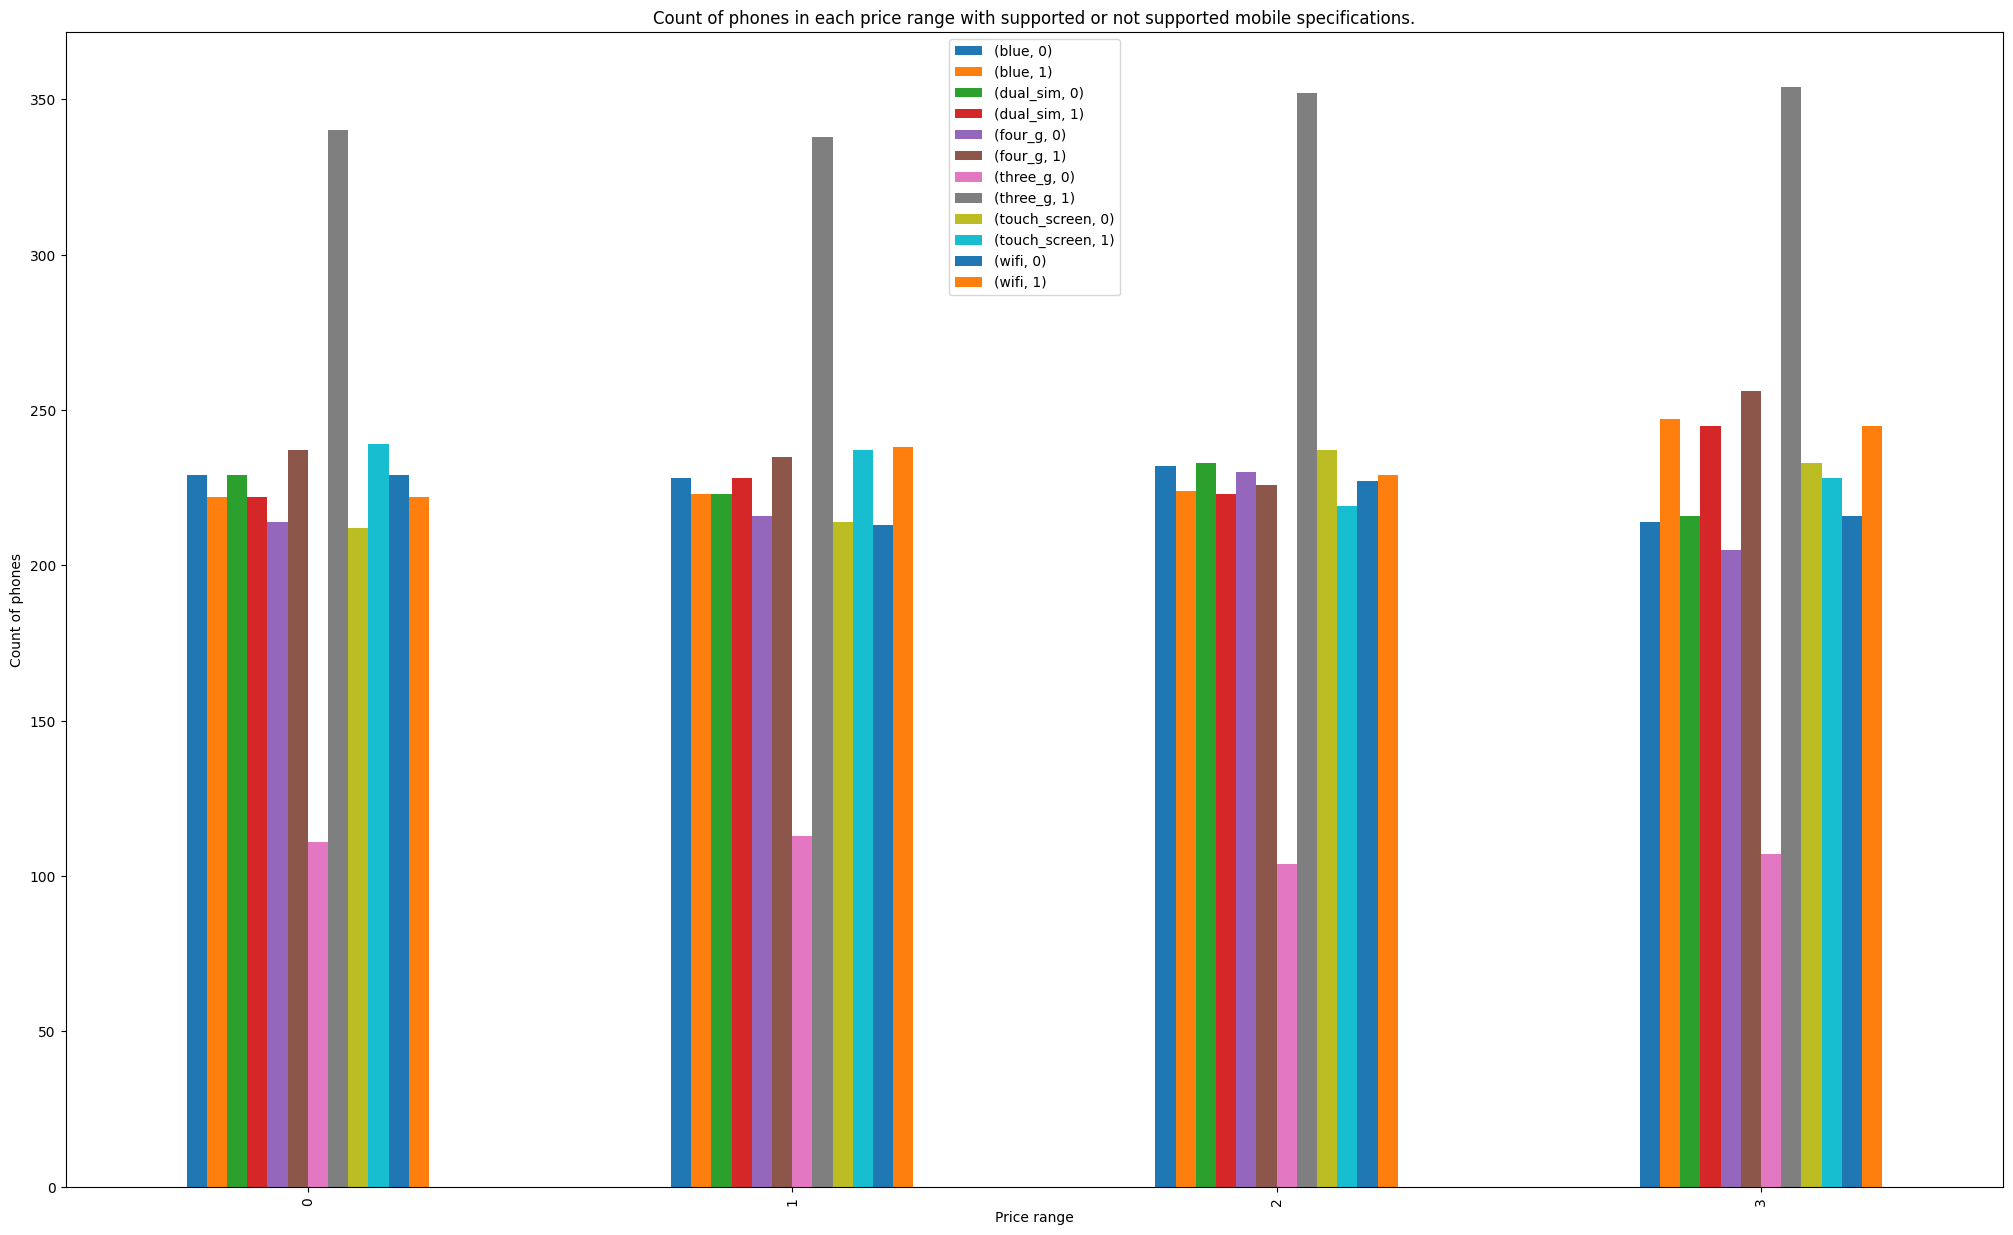

In [ ]:
# Chart - 2 visualization code
#plt.figure(figsize=(12,6))
group_by_price.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')

* We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.

**Checking correlation between Each Features in dataset**

<Axes: >

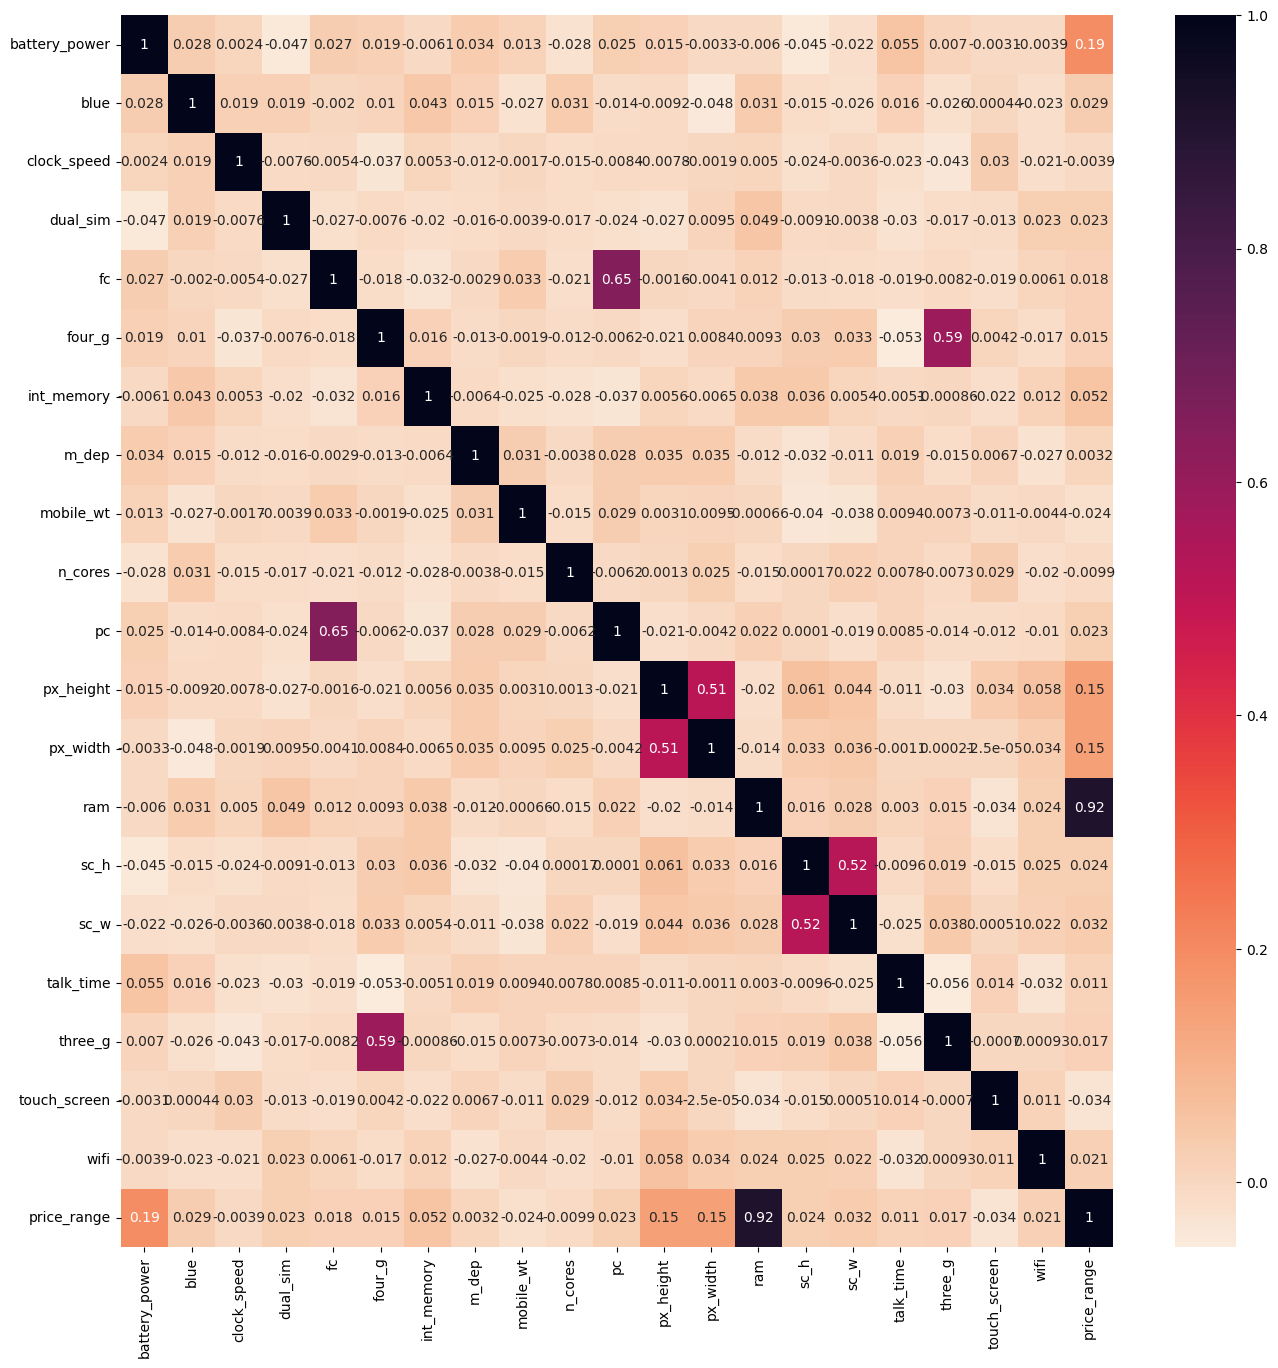

In [ ]:
# Chart - 3 visualization code
correlation = df.corr()
plt.figure(figsize = [16, 16])
sns.heatmap(correlation, cmap = 'rocket_r', annot = True)

**Bluetooth connectivity**

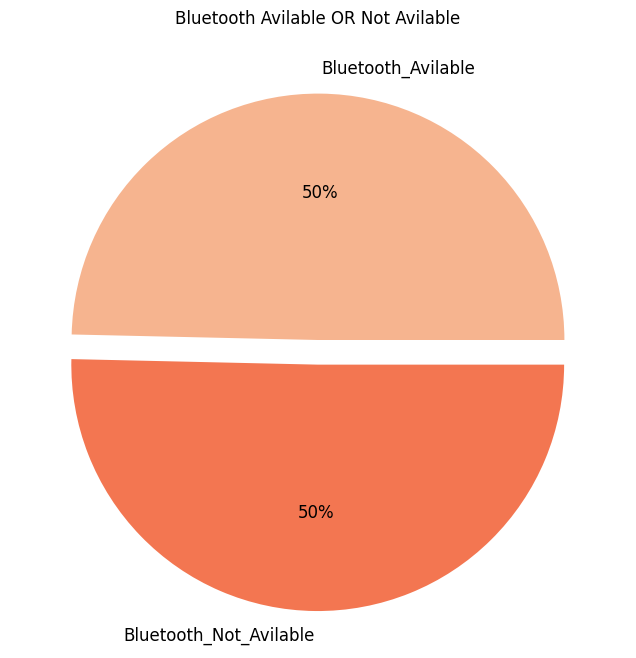

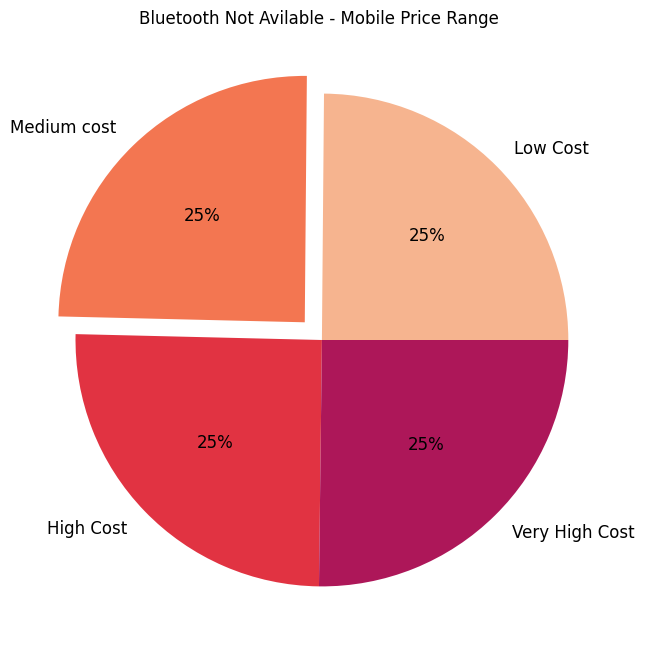

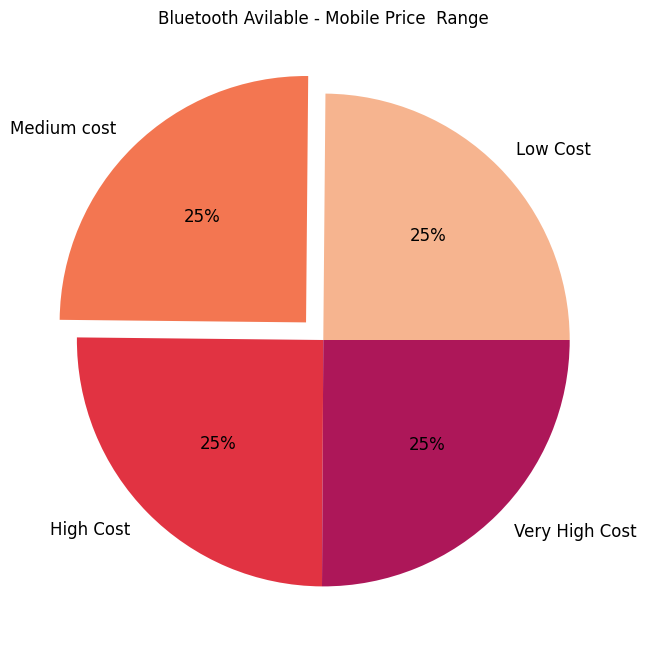

In [ ]:
# Chart - 5 visualization code
#checked if bluetooth available or not???

fig = plt.figure(1, figsize=(8,8))
blue_data = [(len(df[df.blue==0])),(len(df[df.blue==1]))]
blue_keys=["Bluetooth_Avilable","Bluetooth_Not_Avilable"]
explode = [0, 0.1]
palette_color =sns.color_palette('rocket_r')
plt.pie(blue_data, labels=blue_keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Avilable OR Not Avilable')
plt.show()



#Analysis can bluetooth are affected on mobile price or not
data1=df[df.blue==0]
BlueNotAviLowP=(data1['price_range']==0).sum()
BlueNotAviMedP=(data1['price_range']==1).sum()
BlueNotAviHighP=(data1['price_range']==2).sum()
BlueNotAviVHP=(data1['price_range']==2).sum()

BL_NA_P=[BlueNotAviLowP,BlueNotAviMedP,BlueNotAviHighP,BlueNotAviVHP]

data2=df[df.blue==1]
BlueAviLowP=(data2['price_range']==0).sum()
BlueAviMedP=(data2['price_range']==1).sum()
BlueAviHighP=(data2['price_range']==2).sum()
BlueAviVHP=(data2['price_range']==2).sum()

BL_A_P=[BlueAviLowP,BlueAviMedP,BlueAviHighP,BlueAviVHP]

fig = plt.figure(1, figsize=(8,8))
B_DATA= BL_NA_P
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')
plt.pie(B_DATA, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Not Avilable - Mobile Price Range ')
plt.show()

fig = plt.figure(1, figsize=(8,8))
B_DATA1= BL_A_P
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')
plt.pie(B_DATA1, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Avilable - Mobile Price  Range')
plt.show()

**3G And 4G Connectivity**

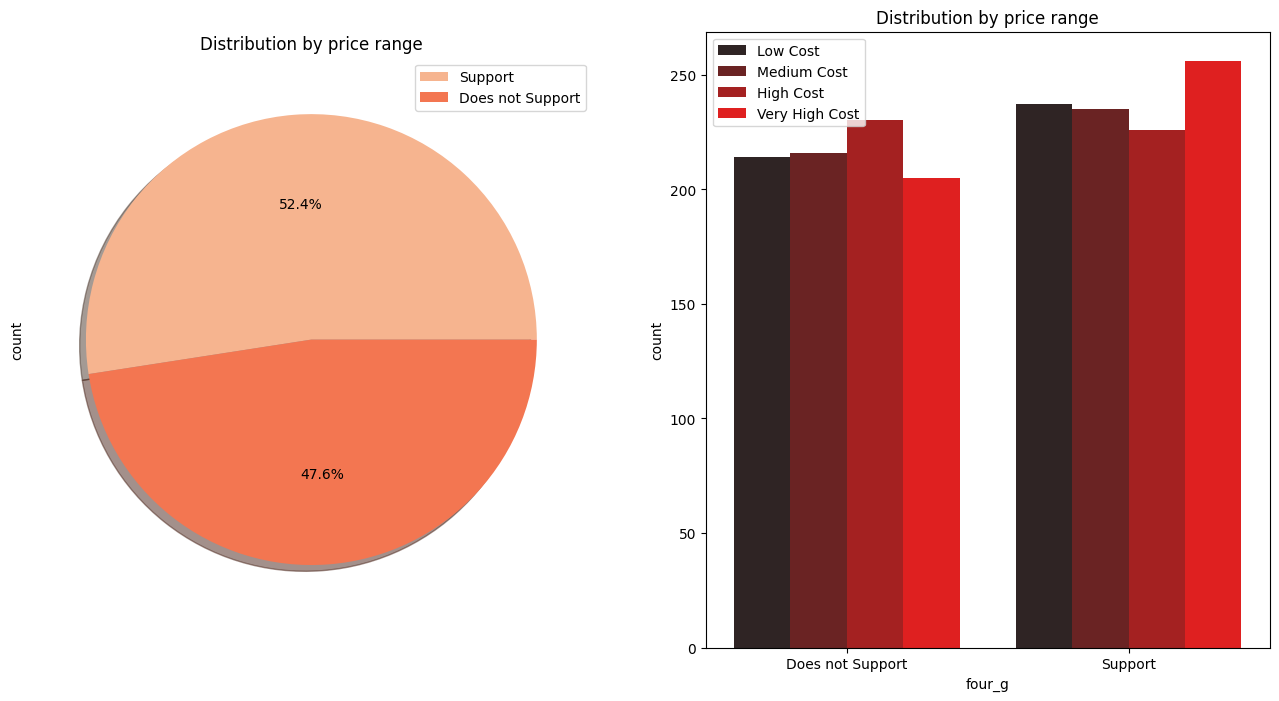

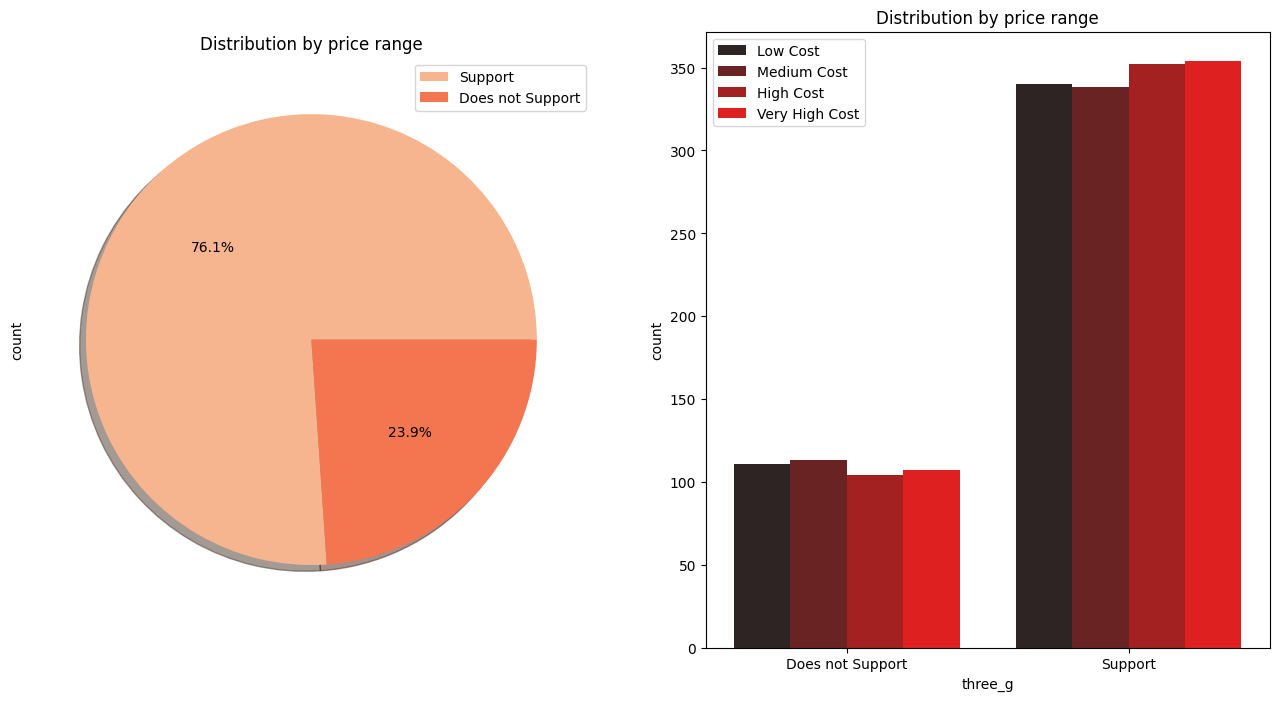

In [ ]:
# Chart - 6 visualization code
binary_features = [ 'four_g', 'three_g']
for dataset in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16, 8))

  df[dataset].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,colors=palette_color, shadow=True,labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = dataset, hue = 'price_range', data = df, ax = ax2, color = 'red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(dataset)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

* Distribution of price range almost similar of supported and non supported feature in 4G .
* Feature 'three_g' play an important feature in Price prediction.

**Mobile weight**

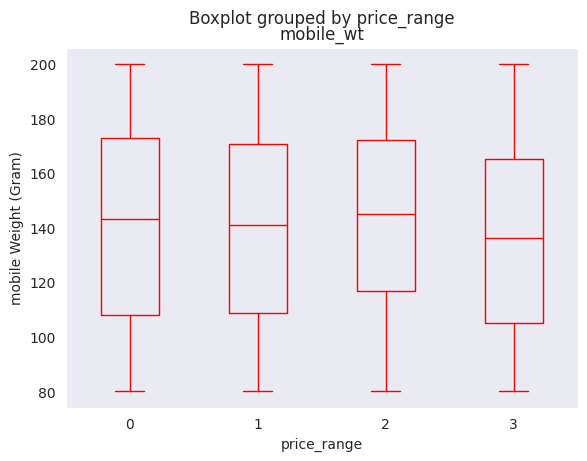

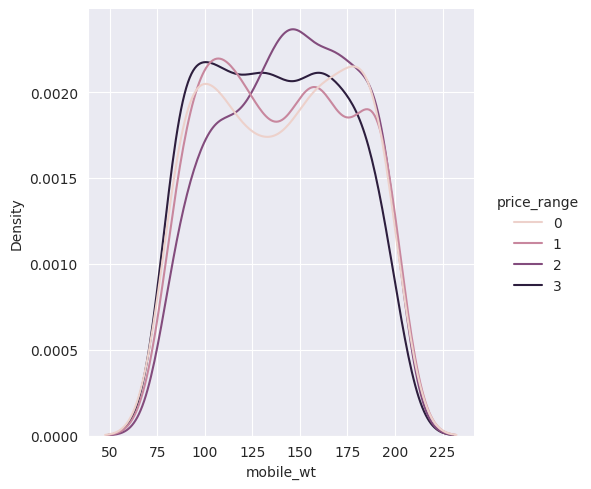

In [ ]:
# Chart - 7 visualization code
sns.set_style("darkgrid")
df.boxplot(by ='price_range', column =['mobile_wt'], grid = False,color='red'),
plt.ylabel("mobile Weight (Gram)")

sns.displot(data=df, x="mobile_wt", hue="price_range", kind="kde")

we can see that in this boxplot,the costly phones are lighter in weight.

**Wifi connection check**

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(14,6))
sns.countplot(df["wifi"] , hue = df["price_range"] , palette = "Reds")
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1400x600 with 0 Axes>

It shows that most of them have wifi connections.

####  - Correlation Heatmap

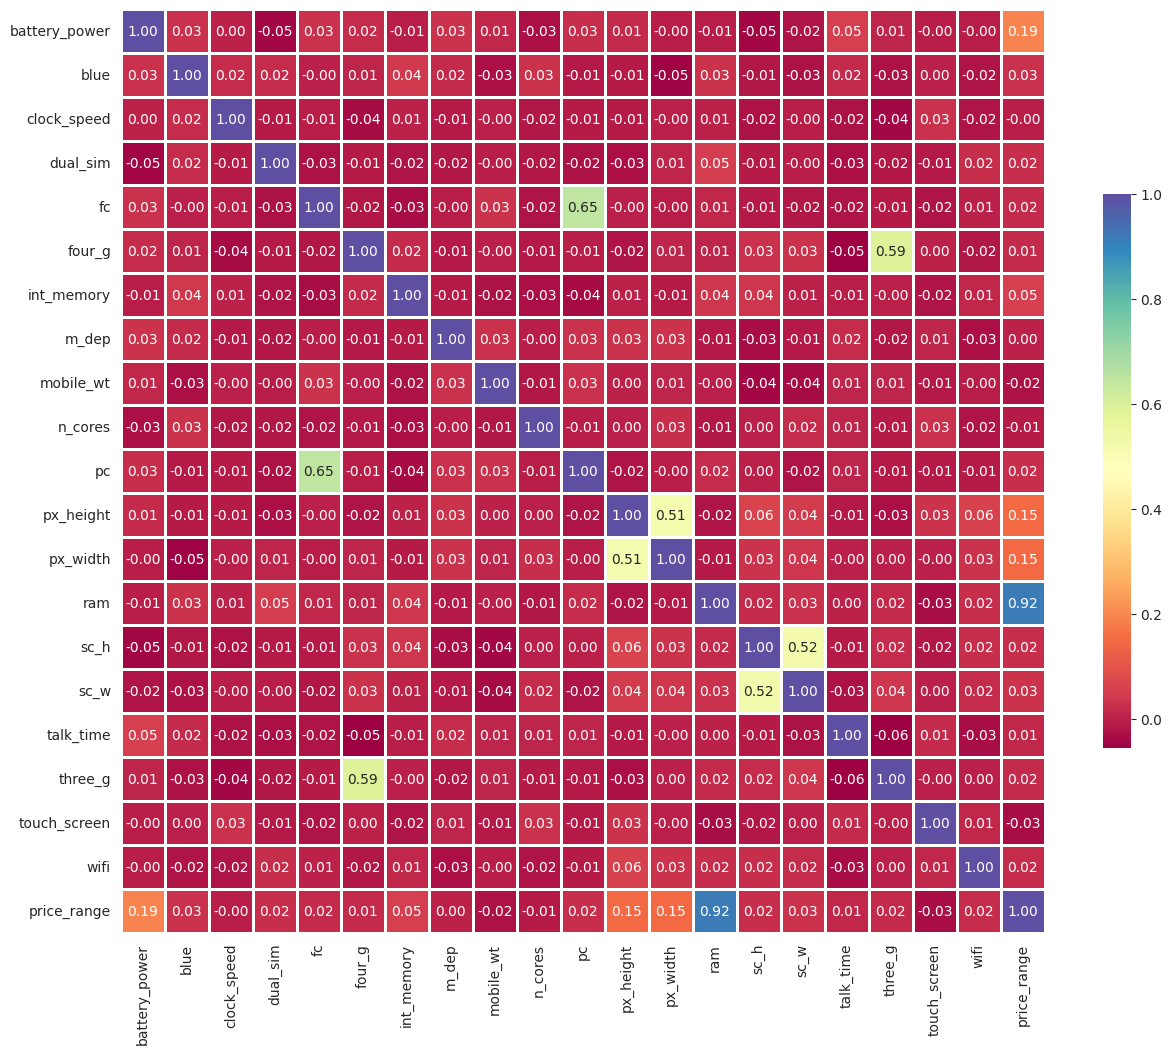

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap="Spectral", cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

The most influential variable is RAM.

Most of the variables have very little correlation to price range.

Primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.

Having 3G and 4G is somewhat correlated.

There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

## ***5. Model Selection, Training & Evaluation***

###  Categorical Encoding

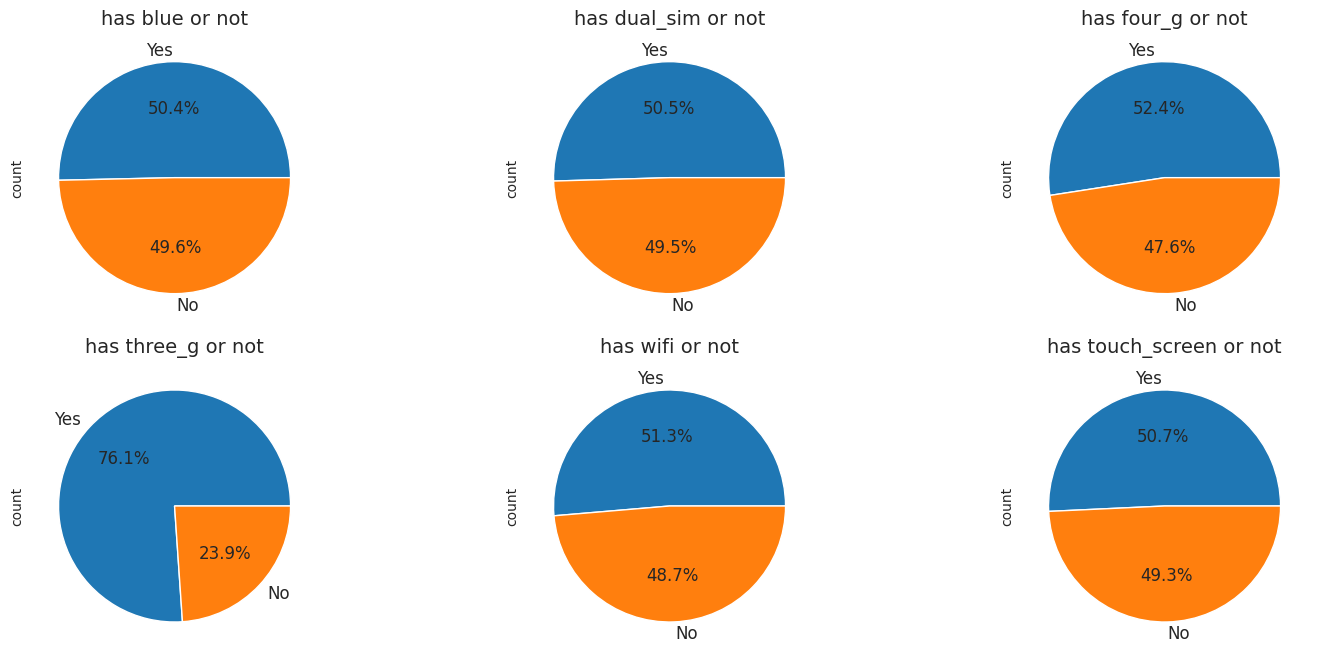

In [ ]:
# Encode your categorical columns

# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

* 1 means it has the specifications.
* 0 means it do not have the specifications.
* Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.
* Very few mobiles(23.9%) do not have 3G.



###  Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# create copy of mobile_data
new_df=df.copy()

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# create new colom screen size and pixels
df['screen_size']= round(np.sqrt(df['sc_h']**2+df['sc_w']**2)/2.54,2)

df['Pixels']=df['px_height']*df['px_width']


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

 #dropping excess columns
df.drop(columns=["sc_h",'sc_w','px_height','px_width'],axis=1,inplace=True)

<Axes: >

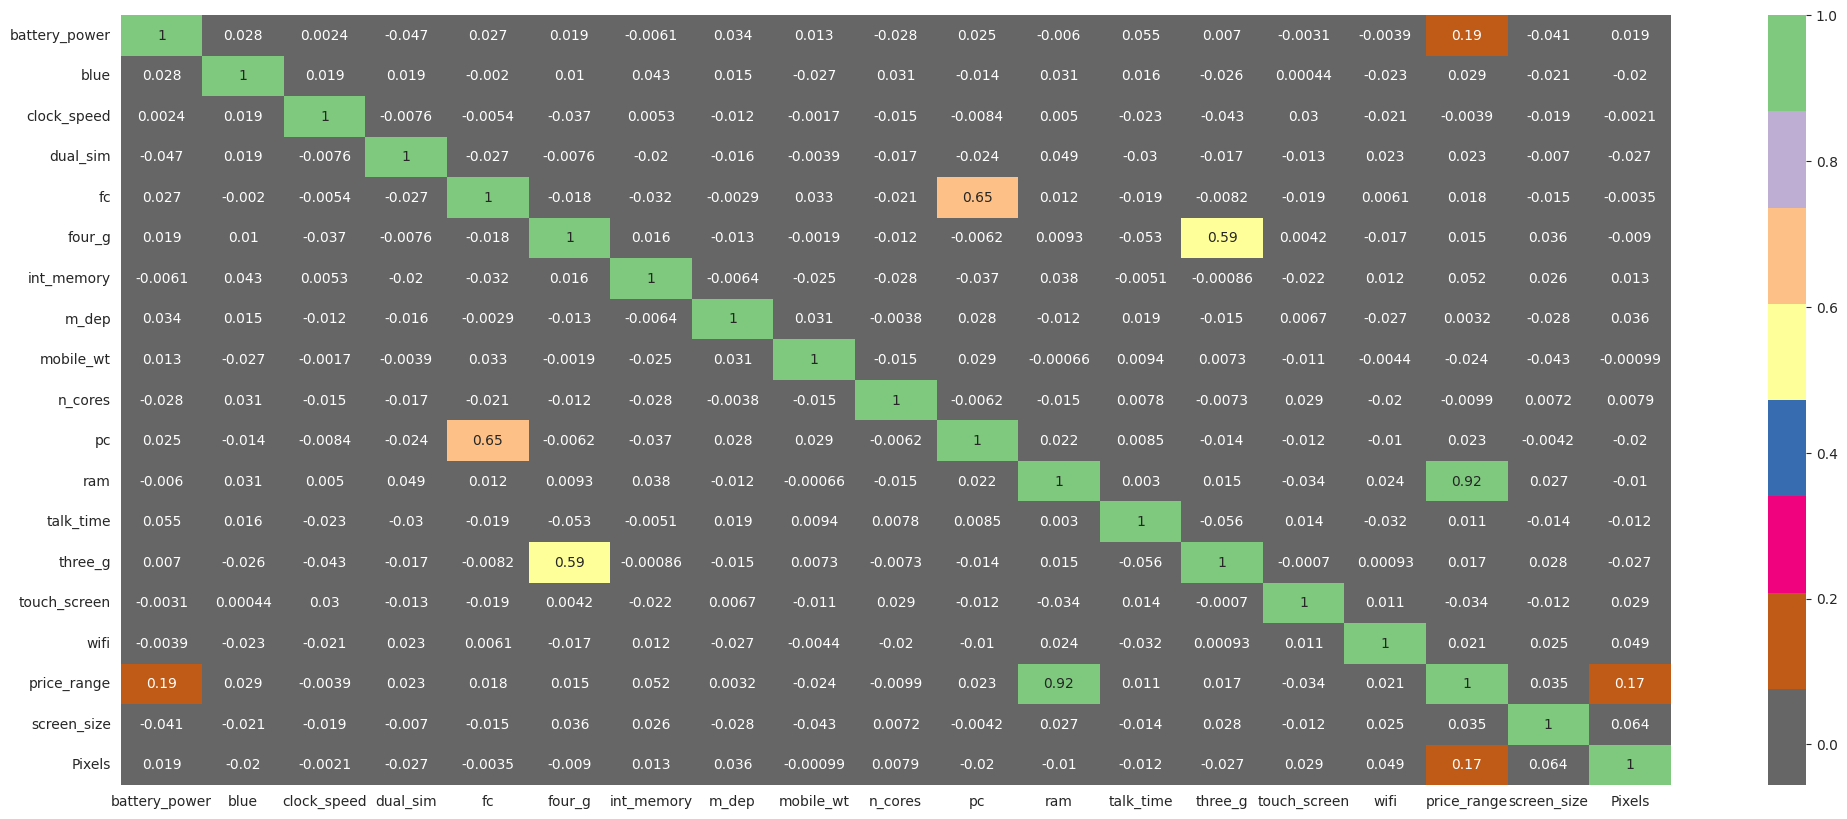

In [ ]:
corr=df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

###  Data Transformation

In [ ]:
# Transform Your data
# creating the set of dependent and independent variables
X = df.drop(labels='price_range', axis=1)
Y = df['price_range']

# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {X.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {Y.shape} respectively.")

The Number of Rows and Columns in X is (1819, 18) respectively.
The Number of Rows and Columns in Y is (1819,) respectively.


### 4. Data Scaling

In [ ]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.22778891, 0.        , 0.68      , ..., 1.        , 0.29915561,
        0.00365318],
       [0.34736139, 1.        , 0.        , ..., 0.        , 0.57780458,
        0.46281548],
       [0.04141617, 1.        , 0.        , ..., 0.        , 0.28829916,
        0.55757275],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 0.        , 0.18817853,
        0.36435304],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 0.7358263 ,
        0.05770195],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 0.67913148,
        0.09349304]])

I used Feature scaling method to normalize the range of independent variables or features of data.

###  Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 42)

In [ ]:
# Getting the shape of Train Test set.

print("Training Dataset Shape:--")
print("X_train shape ", X_train.shape)
print("Y_train shape ", Y_train.shape)
print("Testing Dataset Shape:--")
print("X_test shape ",X_test.shape)
print("Y_test shape ",Y_test.shape)

Training Dataset Shape:--
X_train shape  (1455, 18)
Y_train shape  (1455,)
Testing Dataset Shape:--
X_test shape  (364, 18)
Y_test shape  (364,)


We have made the use of 80% and 20% Training and Testing data respectively.The data should be divided in such a way that neither of them is too high, which is more dependent on the ammount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn’t really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).

###  Handling Imbalanced Dataset

In [ ]:
price_range_values=df['price_range'].value_counts()
price_range_values

price_range
3    461
2    456
1    451
0    451
Name: count, dtype: int64

<Axes: ylabel='count'>

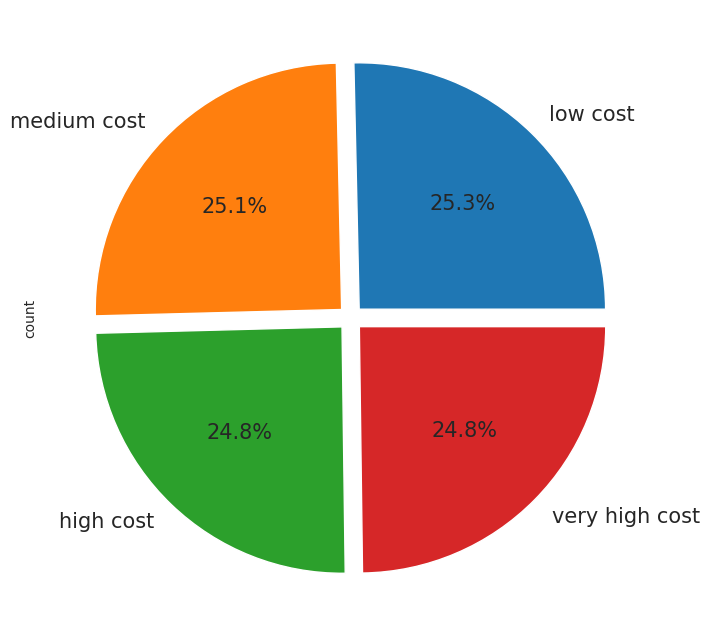

In [ ]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)

We have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.

### Function For Confusion Matrix

In [ ]:
# function for confusion matrix
def matrix(actual, predicted):
  labels = ['0','1','2','3']
  cm = confusion_matrix(actual, predicted)
  print(cm)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## ***6. ML Model Implementation***

### ML Model - 1

**Building a Logistic Regression Model**

In [ ]:
# function for logistic regression
def logistic_regression(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)

  # transforming the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # build a logistic regression model
  log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
  log_reg.fit(X_train, Y_train)

  # get the predicted probabilities
  logistic_train_prob = log_reg.predict_proba(X_train)
  logistic_test_prob = log_reg.predict_proba(X_test)

  # get the predicted classes
  logistic_train_class = log_reg.predict(X_train)
  logistic_test_class = log_reg.predict(X_test)

  # calculating accuracy on train and test set
  logistic_train_acc = accuracy_score(Y_train, logistic_train_class)
  logistic_test_acc = accuracy_score(Y_test, logistic_test_class)

  print("\n")
  print("The accuracy on train dataset is", logistic_train_acc)
  print("The accuracy on test dataset is", logistic_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  log_precision = precision_score(Y_test, logistic_test_class, average='weighted')
  print("The precision on test dataset is", log_precision)

  log_recall = recall_score(Y_test, logistic_test_class, average='weighted')
  print("The recall on test dataset is", log_recall)

  # calculating roc_auc_score on the test set
  log_roc = roc_auc_score(Y_test, logistic_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", log_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, logistic_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  matrix(Y_test, logistic_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, logistic_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': logistic_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return logistic_test_acc, log_precision, log_recall, log_roc

The shape of training set is (1455, 18) (1455,)
The shape of testing set is (364, 18) (364,)


The accuracy on train dataset is 0.9381443298969072
The accuracy on test dataset is 0.9423076923076923


The precision on test dataset is 0.9419049940445509
The recall on test dataset is 0.9423076923076923
The roc auc score on test dataset is 0.9934859517458531


Confusion matrix for train set:
[[343   9   0   0]
 [ 10 330  17   0]
 [  0  18 330  20]
 [  0   0  16 362]]


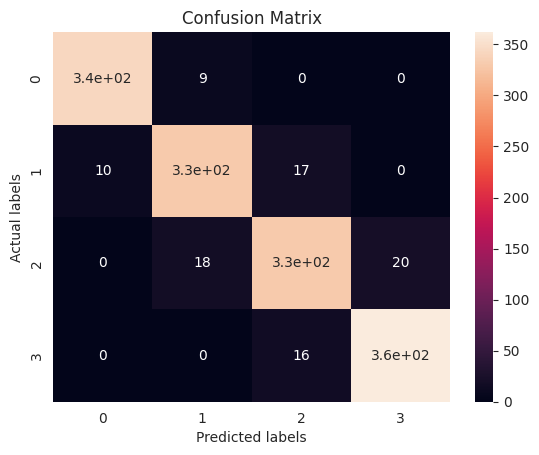

<Figure size 640x480 with 0 Axes>



Confusion matrix for test set:
[[99  0  0  0]
 [ 4 88  2  0]
 [ 0  6 77  5]
 [ 0  0  4 79]]


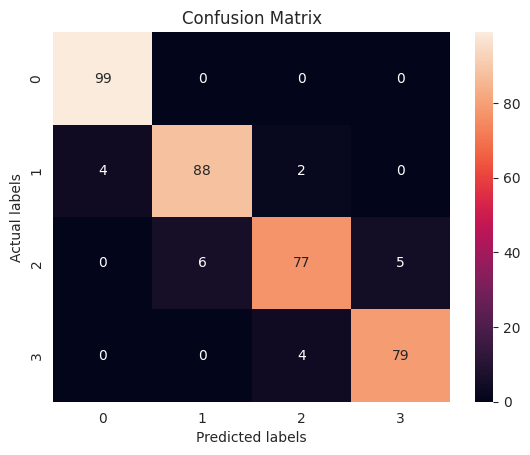

<Figure size 640x480 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       0.94      0.94      0.94        94
           2       0.93      0.88      0.90        88
           3       0.94      0.95      0.95        83

    accuracy                           0.94       364
   macro avg       0.94      0.94      0.94       364
weighted avg       0.94      0.94      0.94       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                3
558              2                2
453              0                0
683              2                2


In [ ]:
#Running the Model
lr = logistic_regression(X,Y)

In [ ]:
# store the metrics of logistic regression
log_acc = lr[0]
log_precision = lr[1]
log_recall = lr[2]
log_roc = lr[3]

### ML Model - 2

**Building a Random Forest Classifier Model**

In [ ]:
# function for random forest
def random_forest(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
              'max_depth': [int(x) for x in np.linspace(5,10,5)],
              'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
              'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)]}

  # build a random forest model
  rf_model = RandomForestClassifier()

  # random search
  rf_grid = RandomizedSearchCV(estimator=rf_model,
                       param_distributions= param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  rf_grid.fit(X_train,Y_train)

  print(rf_grid.best_estimator_)
  rf_optimal_model = rf_grid.best_estimator_
  print(rf_grid.best_params_)

  # get the predicted probabilities
  rf_train_prob = rf_optimal_model.predict_proba(X_train)
  rf_test_prob = rf_optimal_model.predict_proba(X_test)

  # get the predicted classes
  rf_train_class = rf_optimal_model.predict(X_train)
  rf_test_class = rf_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  rf_train_acc = accuracy_score(Y_train, rf_train_class)
  rf_test_acc = accuracy_score(Y_test, rf_test_class)

  print("\n")
  print("The accuracy on train dataset is", rf_train_acc)
  print("The accuracy on test dataset is", rf_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  rf_precision = precision_score(Y_test, rf_test_class, average='weighted')
  print("The precision on test dataset is", rf_precision)

  rf_recall = recall_score(Y_test, rf_test_class, average='weighted')
  print("The recall on test dataset is", rf_recall)

  # calculating roc_auc_score on the test set
  rf_roc = roc_auc_score(Y_test, rf_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", rf_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, rf_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, rf_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, rf_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': rf_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = rf_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return rf_test_acc, rf_precision, rf_recall, rf_roc

The shape of training set is (1455, 18) (1455,)
The shape of testing set is (364, 18) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=3,

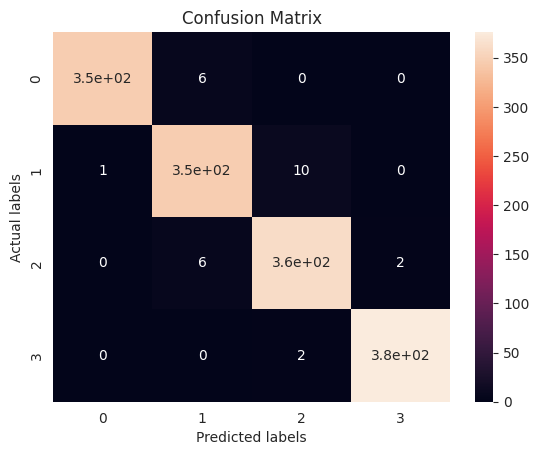

<Figure size 640x480 with 0 Axes>


 Confusion matrix for test set:
[[93  6  0  0]
 [ 4 79 11  0]
 [ 0 12 64 12]
 [ 0  0  9 74]]


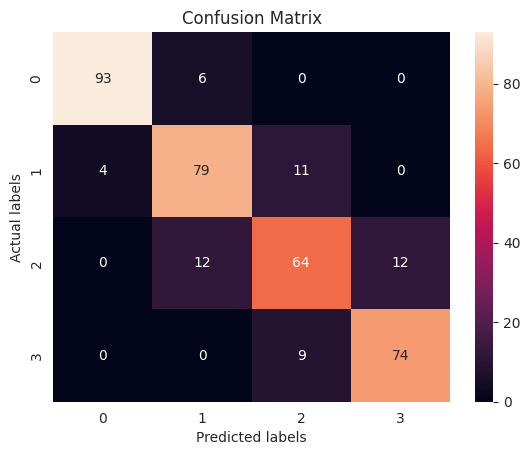

<Figure size 640x480 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        99
           1       0.81      0.84      0.83        94
           2       0.76      0.73      0.74        88
           3       0.86      0.89      0.88        83

    accuracy                           0.85       364
   macro avg       0.85      0.85      0.85       364
weighted avg       0.85      0.85      0.85       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                3
453              0                0
683              2                2


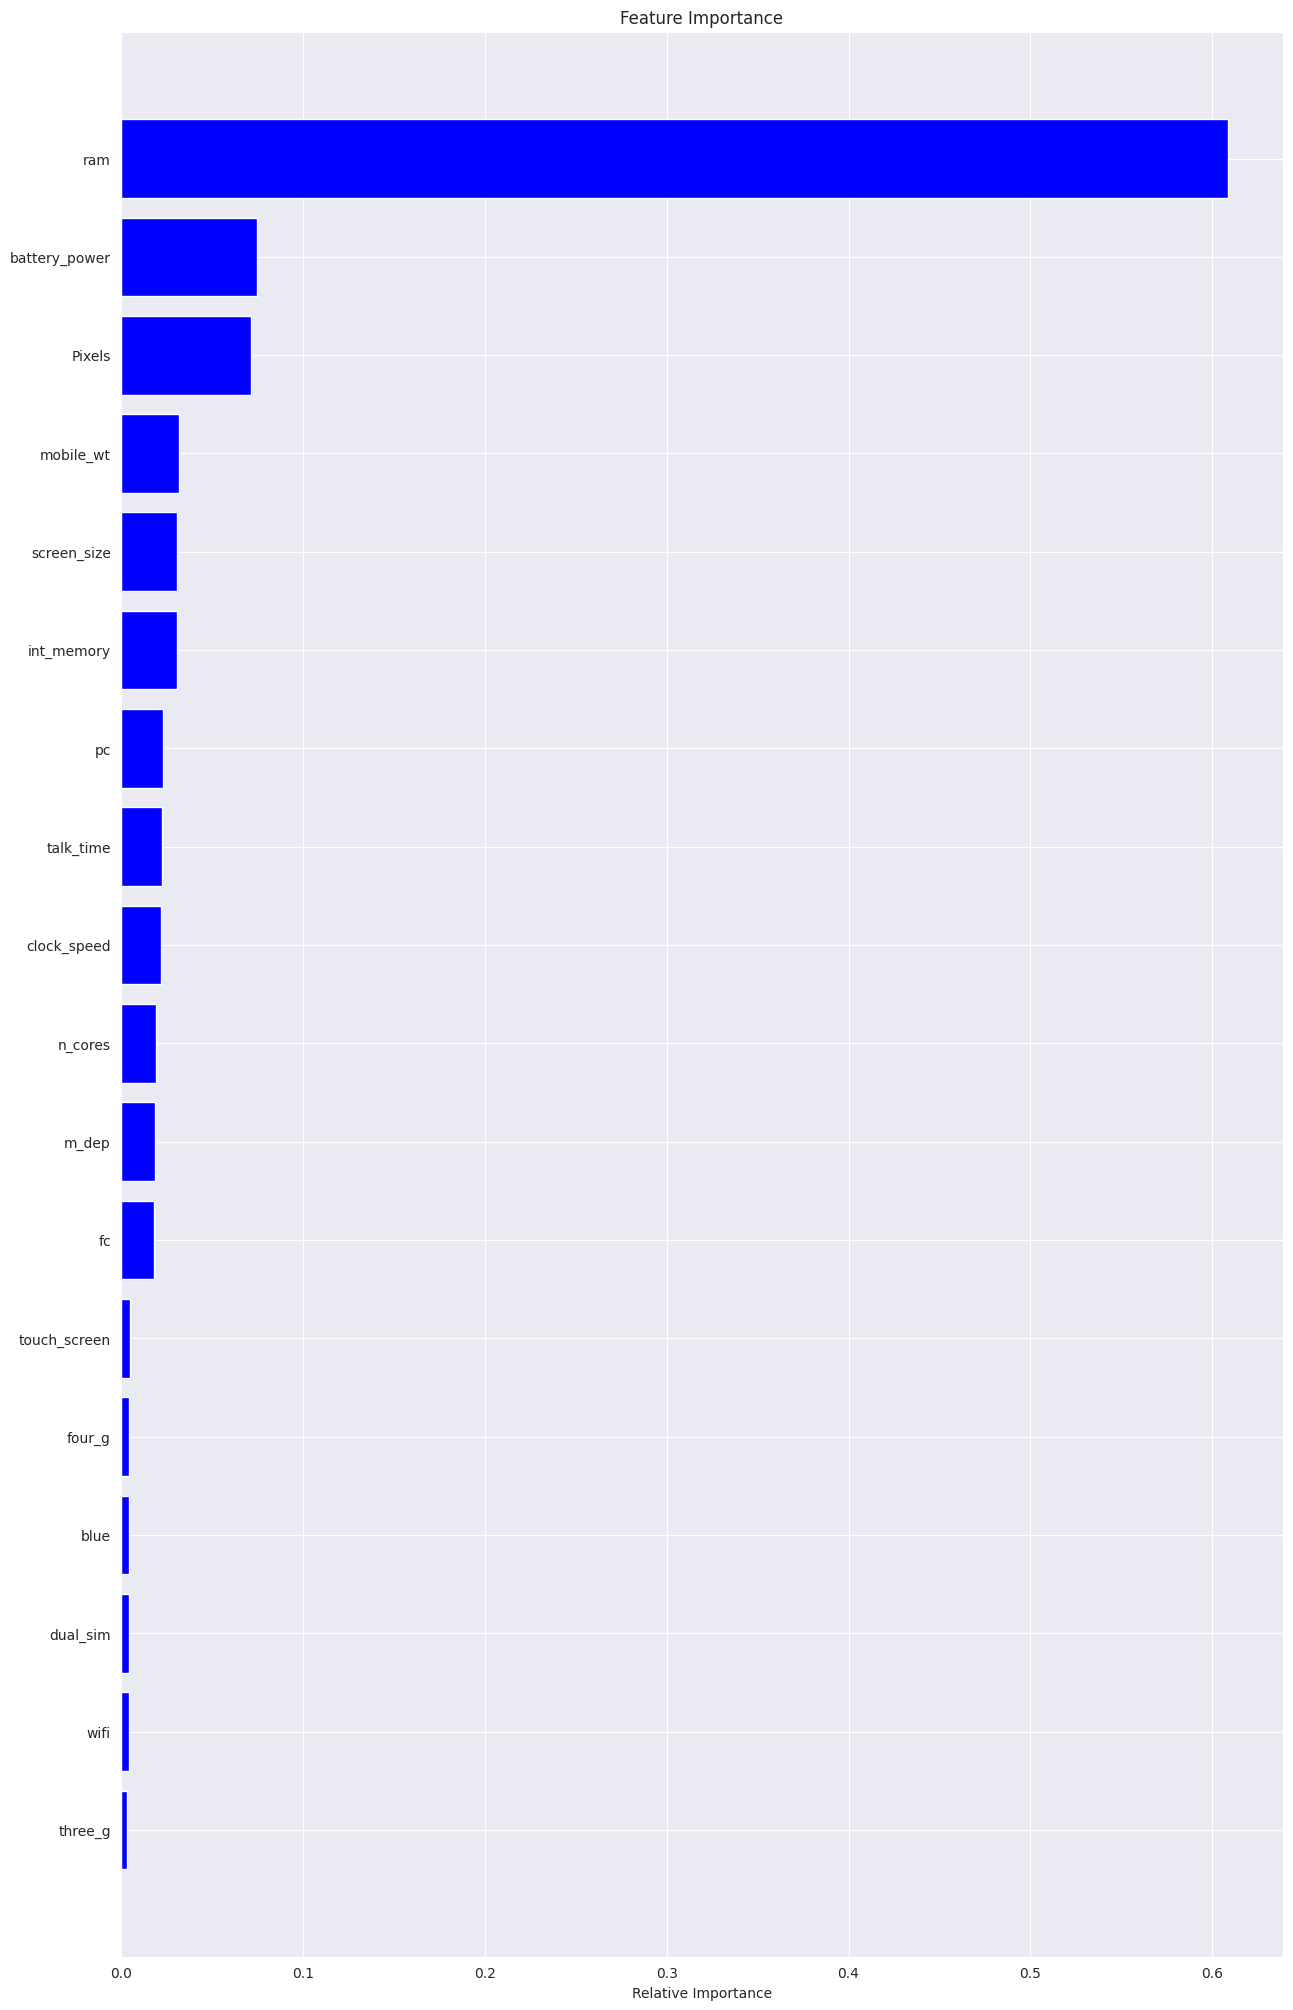

          Feature  Feature Importance
11            ram                0.61
0   battery_power                0.07
17         Pixels                0.07
6      int_memory                0.03
8       mobile_wt                0.03
16    screen_size                0.03
4              fc                0.02
7           m_dep                0.02
10             pc                0.02
2     clock_speed                0.02
12      talk_time                0.02
9         n_cores                0.02
3        dual_sim                0.00
5          four_g                0.00
1            blue                0.00
13        three_g                0.00
14   touch_screen                0.00
15           wifi                0.00


In [ ]:
#Running the Model
rf = random_forest(X,Y)

The shape of training set is (1455, 2) (1455,)
The shape of testing set is (364, 2) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf

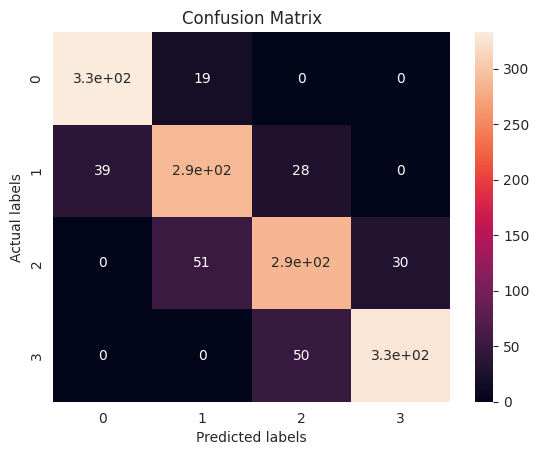

<Figure size 640x480 with 0 Axes>


 Confusion matrix for test set:
[[93  6  0  0]
 [ 7 79  8  0]
 [ 0 18 58 12]
 [ 0  0 19 64]]


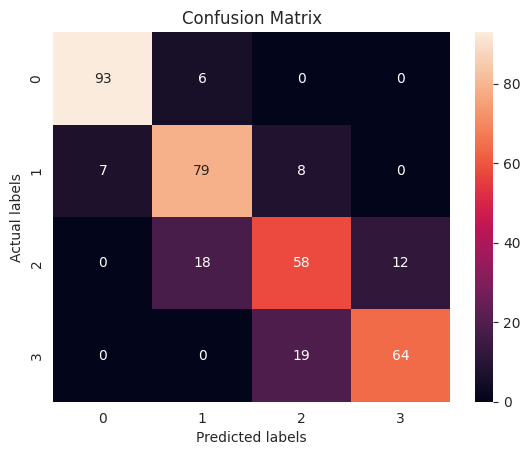

<Figure size 640x480 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        99
           1       0.77      0.84      0.80        94
           2       0.68      0.66      0.67        88
           3       0.84      0.77      0.81        83

    accuracy                           0.81       364
   macro avg       0.81      0.80      0.80       364
weighted avg       0.81      0.81      0.81       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                1
453              0                0
683              2                2


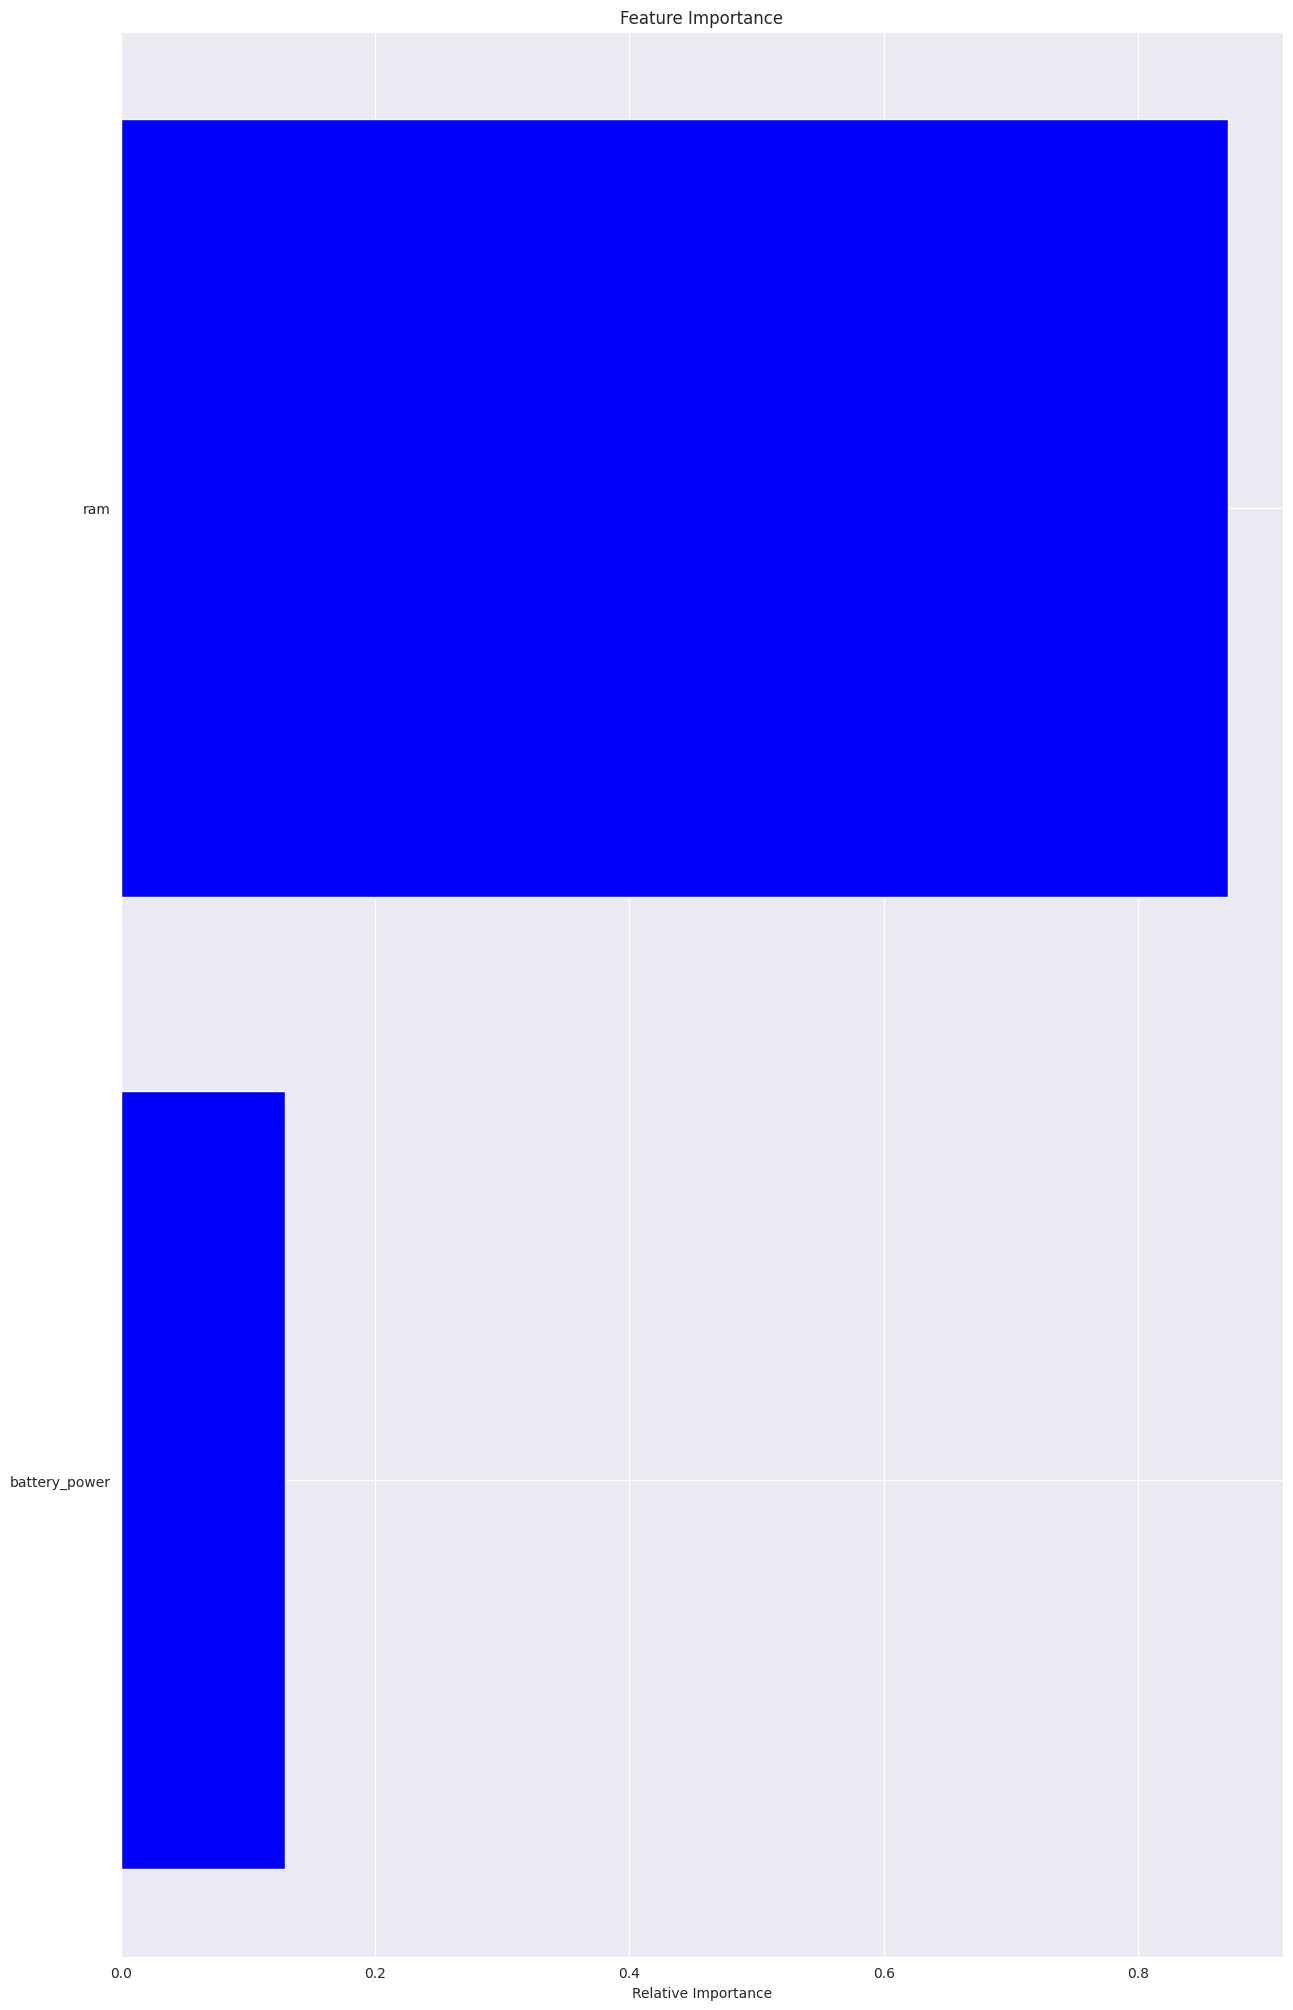

         Feature  Feature Importance
0            ram                0.87
1  battery_power                0.13


In [ ]:
# select the most important features for modeling
X_new = df[['ram','battery_power']]
rf_new = random_forest(X_new,Y)

In [ ]:
# store the metrics of random forest
rf_acc = rf_new[0]
rf_precision = rf_new[1]
rf_recall = rf_new[2]
rf_roc = rf_new[3]

### ML Model - 3

**Building A XG Boost Model**

In [ ]:
# function for xgboost
def xg_boost(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
                'max_depth': [int(x) for x in np.linspace(5,10,5)],
                'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
                'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)],
                'learning_rate': [0.01,0.02,0.05,0.07,0.1]}

  # build a xgboost model
  xgb_model = XGBClassifier()

  # random search
  xgb_grid = RandomizedSearchCV(estimator=xgb_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  xgb_grid.fit(X_train,Y_train)

  print(xgb_grid.best_estimator_)
  xgb_optimal_model = xgb_grid.best_estimator_
  print(xgb_grid.best_params_)
  print("\n")

  # get the predicted probabilities
  xgb_train_prob = xgb_optimal_model.predict_proba(X_train)
  xgb_test_prob = xgb_optimal_model.predict_proba(X_test)

  # get the predicted classes
  xgb_train_class = xgb_optimal_model.predict(X_train)
  xgb_test_class = xgb_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  xgb_train_acc = accuracy_score(Y_train, xgb_train_class)
  xgb_test_acc = accuracy_score(Y_test, xgb_test_class)

  print("The accuracy on train set is", xgb_train_acc)
  print("The accuracy on test set is", xgb_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  xgb_precision = precision_score(Y_test, xgb_test_class, average='weighted')
  print("The precision on test dataset is", xgb_precision)

  xgb_recall = recall_score(Y_test, xgb_test_class, average='weighted')
  print("The recall on test dataset is", xgb_recall)

  # calculating roc_auc_score on the test set
  xgb_roc = roc_auc_score(Y_test, xgb_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", xgb_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, xgb_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, xgb_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, xgb_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': xgb_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = xgb_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return xgb_test_acc, xgb_precision, xgb_recall, xgb_roc

The shape of training set is (1455, 18) (1455,)
The shape of testing set is (364, 18) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.07, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.07, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.07, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.07, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.07, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.07, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.4s
[CV] END learning_rate=0.07, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.

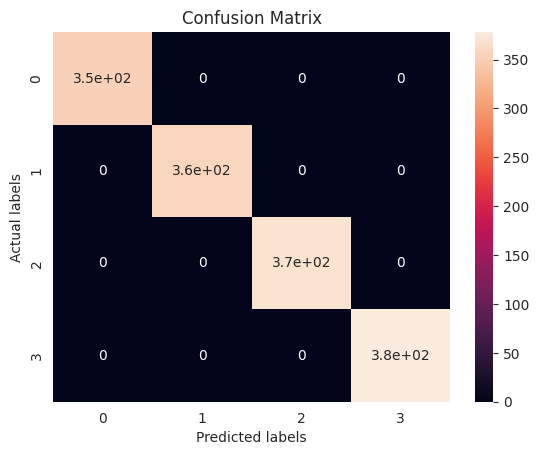

<Figure size 640x480 with 0 Axes>


 Confusion matrix for test set:
[[94  5  0  0]
 [ 4 86  4  0]
 [ 0  8 73  7]
 [ 0  0  9 74]]


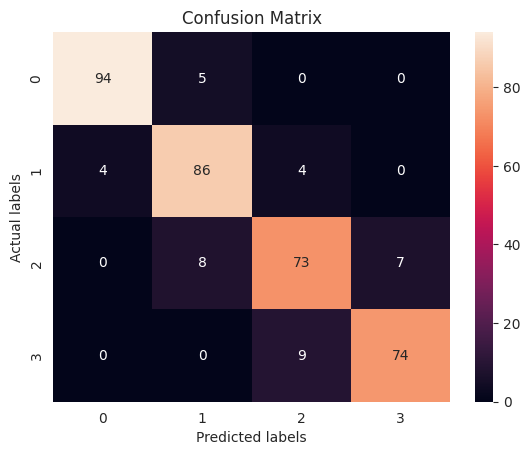

<Figure size 640x480 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.87      0.91      0.89        94
           2       0.85      0.83      0.84        88
           3       0.91      0.89      0.90        83

    accuracy                           0.90       364
   macro avg       0.90      0.90      0.90       364
weighted avg       0.90      0.90      0.90       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                3
453              0                0
683              2                2


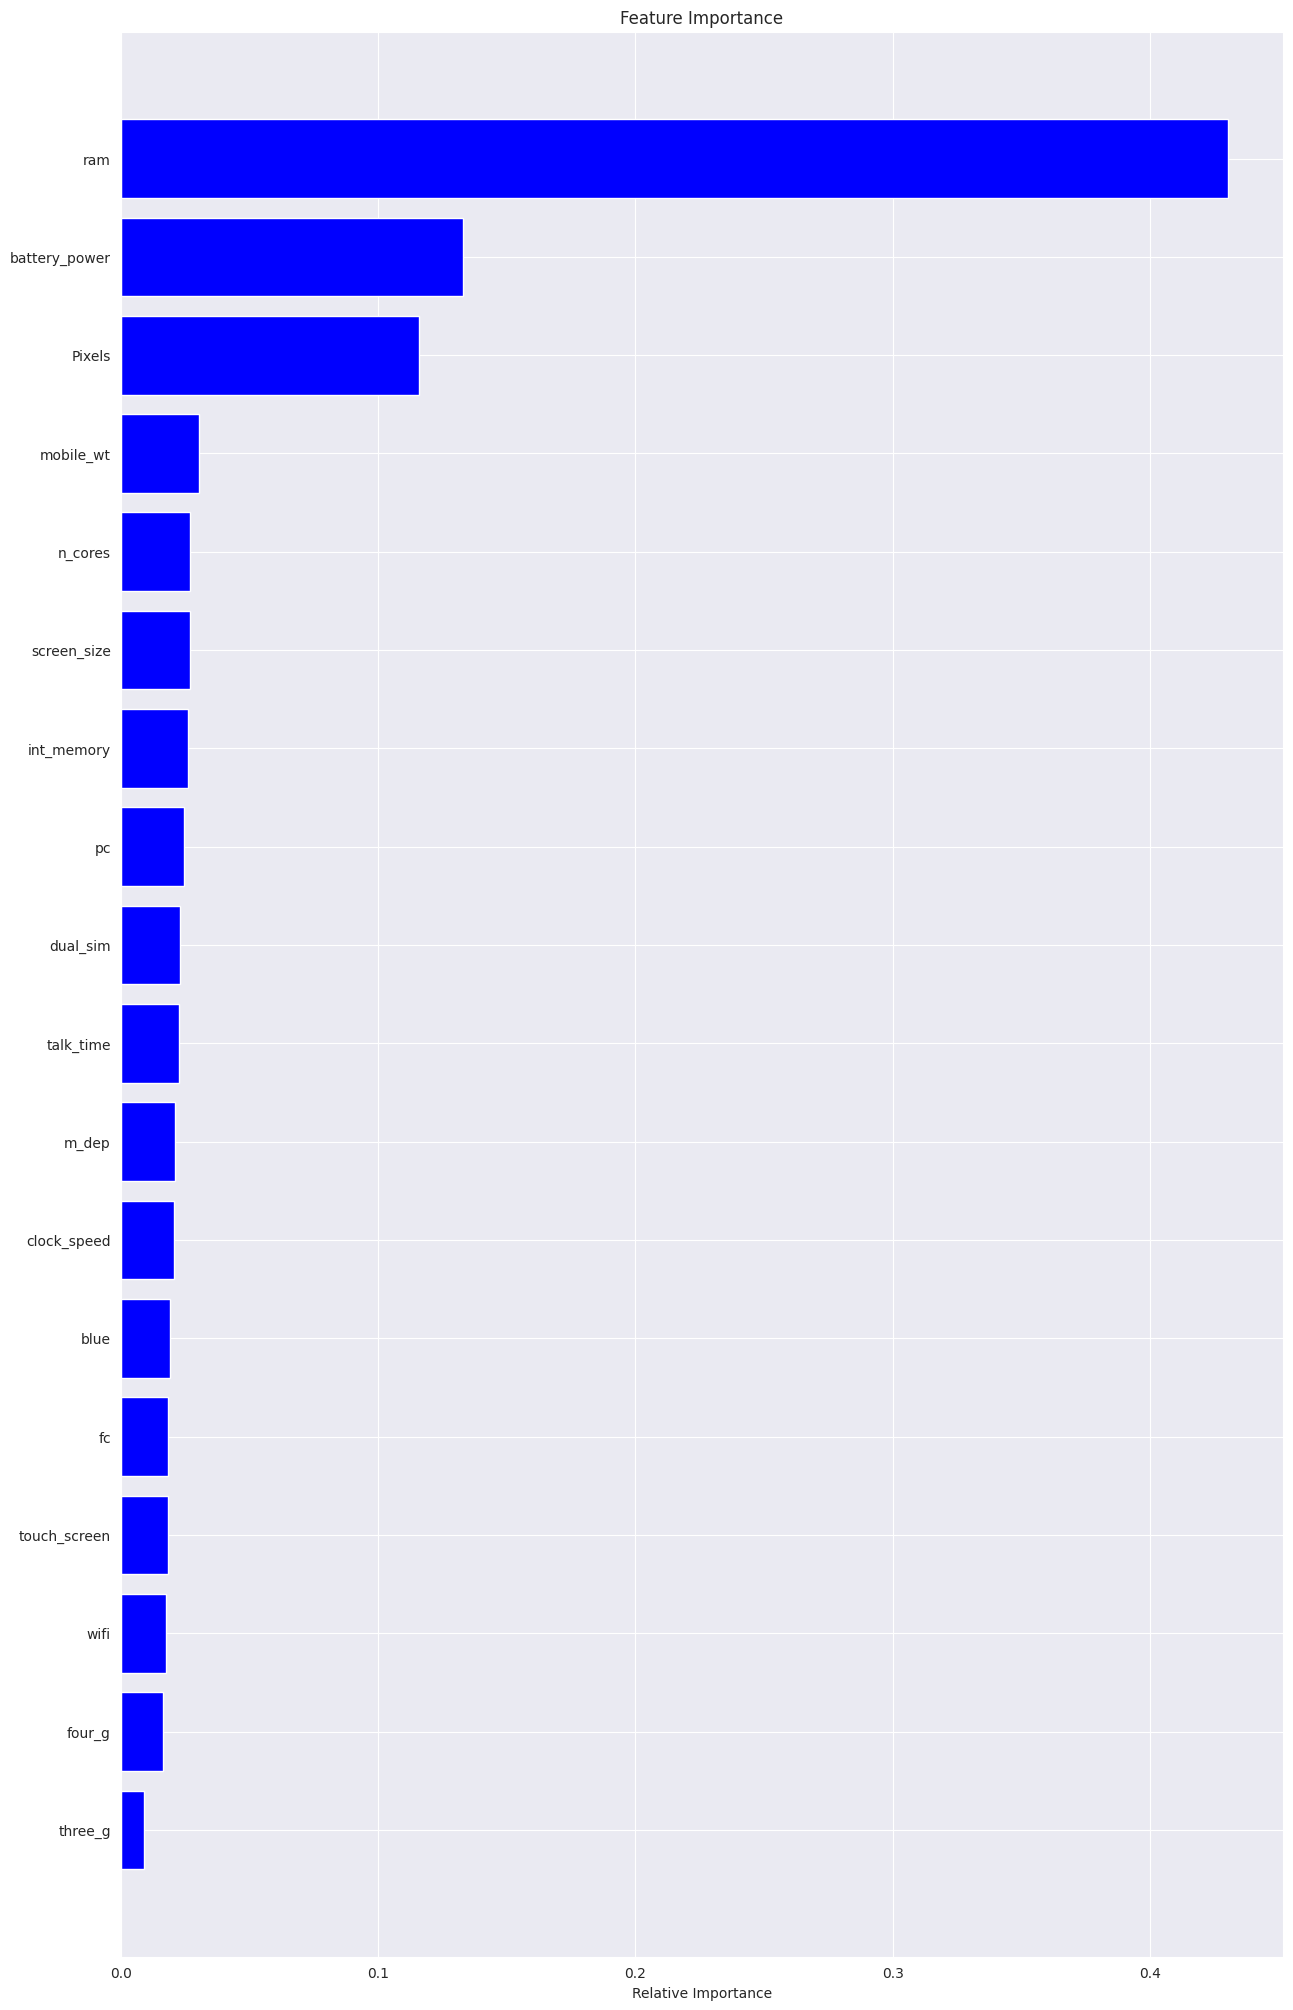

          Feature  Feature Importance
11            ram                0.43
0   battery_power                0.13
17         Pixels                0.12
6      int_memory                0.03
8       mobile_wt                0.03
16    screen_size                0.03
9         n_cores                0.03
3        dual_sim                0.02
4              fc                0.02
5          four_g                0.02
7           m_dep                0.02
1            blue                0.02
10             pc                0.02
2     clock_speed                0.02
12      talk_time                0.02
14   touch_screen                0.02
15           wifi                0.02
13        three_g                0.01


In [ ]:
# run the model
xgb = xg_boost(X,Y)

The shape of training set is (1455, 2) (1455,)
The shape of testing set is (364, 2) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV]

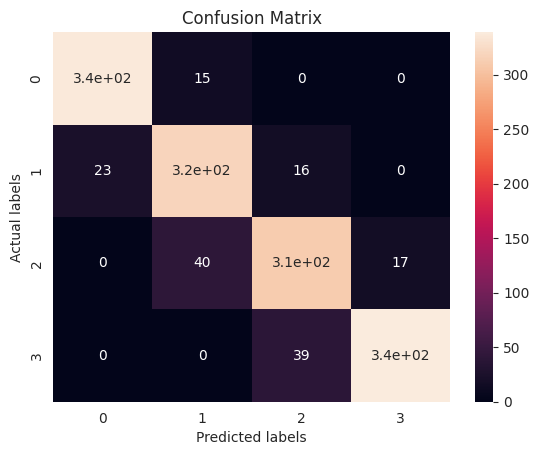

<Figure size 640x480 with 0 Axes>


 Confusion matrix for test set:
[[91  8  0  0]
 [ 6 78 10  0]
 [ 0 17 59 12]
 [ 0  0 20 63]]


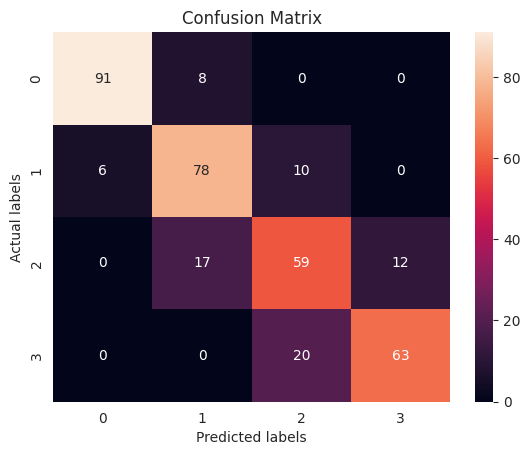

<Figure size 640x480 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        99
           1       0.76      0.83      0.79        94
           2       0.66      0.67      0.67        88
           3       0.84      0.76      0.80        83

    accuracy                           0.80       364
   macro avg       0.80      0.79      0.80       364
weighted avg       0.80      0.80      0.80       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                1
453              0                0
683              2                2


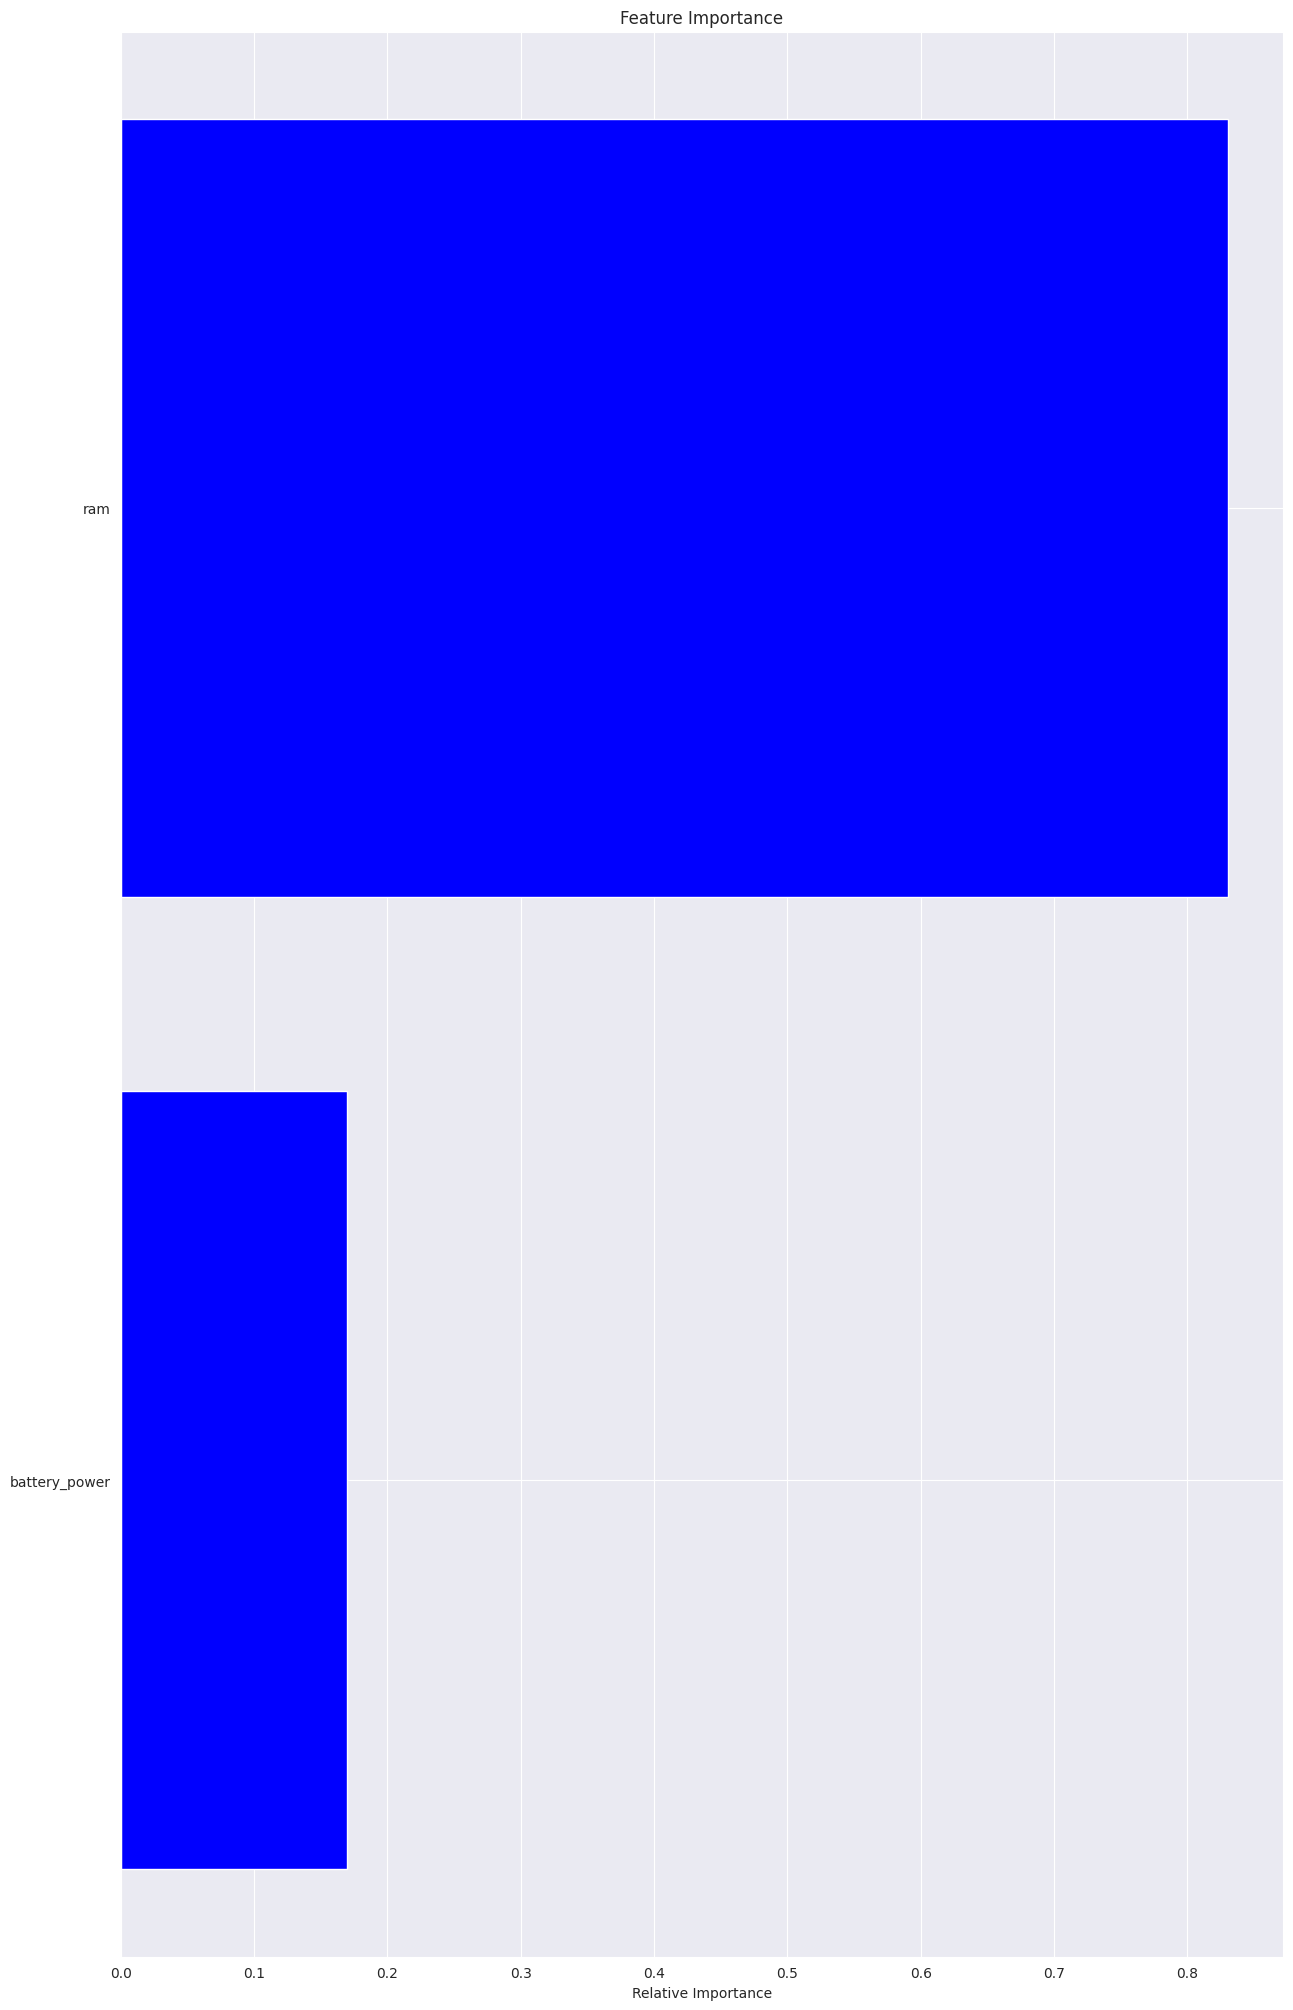

         Feature  Feature Importance
0            ram                0.83
1  battery_power                0.17


In [ ]:
# select the most important features for modeling
X_new = df[['ram','battery_power']]
xgb_new = xg_boost(X_new,Y)

In [ ]:
# store the metrics of xgboost
xgb_acc = xgb_new[0]
xgb_precision = xgb_new[1]
xgb_recall = xgb_new[2]
xgb_roc = xgb_new[3]

**Now Comparing all the Models**

In [ ]:
# a dataframe to compare all the models
models_df = pd.DataFrame(
    {'Models': ['Logistic Regression','Random Forest','XG Boost'],
     'Accuracy': [log_acc, rf_acc, xgb_acc],
     'Precision': [log_precision, rf_precision,  xgb_precision],
     'Recall': [log_recall, rf_recall,  xgb_recall],
     'ROC AUC': [log_roc, rf_roc,  xgb_roc,]}
)
models_df.sort_values(by=['Accuracy'], ascending=False, inplace=True)
models_df

,Models,Accuracy,Precision,Recall,ROC AUC
0,Logistic Regression,0.942308,0.941905,0.942308,0.993486
1,Random Forest,0.807692,0.807991,0.807692,0.950628
2,XG Boost,0.799451,0.802522,0.799451,0.950576


Accuracy score will be the best evalaution metric to select the model.

Logistic Regression performs the best among the three classification methods used.

Random forest and XG Boost perform almost same.





# **Conclusion**

* From EDA we can see that, there are mobile phones in 4 price ranges.
The number of elements is almost similar.

* Half the devices have Bluetooth, and half don’t.

* There is a gradual increase in battery as the price range increases.

* Ram has continuous increase with price range while moving from Low cost to Very high cost.

* Costly phones are lighter.

* RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

I have implemented 3 classification models and achieved a fairly good result for all the algorithms.

* Logistic Regression
* Random Forest
* XG Boost

* Logistic regression shows approx accuracy of 90% and the other two shows approx 80% accuracy, which shows that the data were properly classified.

* Logistic Regression performed better than the other two model.

### ***Hurrah! We have successfully completed your Machine Learning Capstone Project !!!***